#  Predicting whether a given adult makes more than 50,000 a year or not: Machine Learning Algorithms and Optimization by Odion Sandra Imhanze


In [1]:
# Data Handling and Processing
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Interactive Widgets
import ipywidgets as widgets
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact

# Dash for Interactive Web Applications
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

# Data Encoding and Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Model Building
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

# Model Evaluation
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, silhouette_score
from sklearn.utils.validation import check_is_fitted

# Model Training Utilities
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# Dimensionality Reduction
from sklearn.decomposition import PCA

# General Settings
# Setting up matplotlib for inline plotting (if using Jupyter Notebook)
%matplotlib inline

# Suppressing warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')


# Task 1.  Load and explore the data (note your observations).

In [2]:
# Reading the dataset
df = pd.read_csv("CensusDB.csv")

In [3]:
df.head()

age workclass  fnlwgt     education  education-num marital-status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship     sex  capital-gain  capital-loss  \
0                  ?  Not-in-family  Female             0          4356   
1    Exec-managerial  Not-in-family  Female             0          4356   
2                  ?      Unmarried  Female             0          4356   
3  Machine-op-inspct      Unmarried  Female             0          3900   
4     Prof-specialty      Own-child  Female             0          3900   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              18  United-States  <=50K  
2              40  United-States  <=50K  
3              40  United-States  <=50K  
4              40  United-States  <=50K

In [4]:
# Getting a view of the beginning and end of the dataset
df

age workclass  fnlwgt     education  education-num      marital-status  \
0       90         ?   77053       HS-grad              9             Widowed   
1       82   Private  132870       HS-grad              9             Widowed   
2       66         ?  186061  Some-college             10             Widowed   
3       54   Private  140359       7th-8th              4            Divorced   
4       41   Private  264663  Some-college             10           Separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married   

              occupation   relationship     sex  capital-gain  capital-loss  \
0                      ?  Not-in-family  Female             0          4356   
1        Exec-managerial  Not-in-family  Female             0          4356   
2                      ?      Unmarried  Female             0          4356   
3      Machine-op-inspct      Unmarried  Female             0          3900   
4         Prof-specialty      Own-child  Female             0          3900   
...                  ...            ...     ...           ...           ...   
32556    Protective-serv  Not-in-family    Male             0             0   
32557       Tech-support           Wife  Female             0             0   
32558  Machine-op-inspct        Husband    Male             0             0   
32559       Adm-clerical      Unmarried  Female             0             0   
32560       Adm-clerical      Own-child    Male             0             0   

       hours-per-week native-country income  
0                  40  United-States  <=50K  
1                  18  United-States  <=50K  
2                  40  United-States  <=50K  
3                  40  United-States  <=50K  
4                  40  United-States  <=50K  
...               ...            ...    ...  
32556              40  United-States  <=50K  
32557              38  United-States  <=50K  
32558              40  United-States   >50K  
32559              40  United-States  <=50K  
32560              20  United-States  <=50K  

[32561 rows x 14 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  income          32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [6]:
#summary descriptive analysis of the dataset(numerical values)
df.describe()

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [7]:
#summary descriptive analysis of the dataset(categorical variables)
df.describe(include="object").T

count unique                 top   freq
workclass       32561      9             Private  22696
education       32561     16             HS-grad  10501
marital-status  32561      7  Married-civ-spouse  14976
occupation      32561     15      Prof-specialty   4140
relationship    32561      6             Husband  13193
sex             32561      2                Male  21790
native-country  32561     42       United-States  29170
income          32561      2               <=50K  24720

### Checking for Unique Values for each columns

In [8]:
def unique_values(df):
    for i in df.select_dtypes(include='object'):
        if len(df[i].unique()): 
            print(f"Unique values of  '{i}':\n")
            print(df[i].unique())
            print("\n-------------------\n")

unique_values(df)

Unique values of  'workclass':

['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']

-------------------

Unique values of  'education':

['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']

-------------------

Unique values of  'marital-status':

['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']

-------------------

Unique values of  'occupation':

['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

-------------------

Unique values of  'relationship':

['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']

-------------------

From the analysis above, it provides insights into the categorical variables present in the dataset, highlighting the diversity and scope of each feature. It is also observed that most columns have accurate unique values. However, the **'workclass'**, **'occupation'**, and **'native-country'** columns contain the question mark symbol (?) among their unique values. These symbols indicate that the observations for those columns are unknown, possibly due to incomplete information provided by the samples or data discrepancies during the data collection process. It's important to address these unknown values appropriately, such as by replacing '?' with 'Unknown' to ensure that missing data does not affect the quality and integrity of future analyses. This preprocessing step is crucial for maintaining data consistency and reliability in subsequent data exploration and modeling tasks.

### Checking for Missing Values

In [9]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

<Axes: >

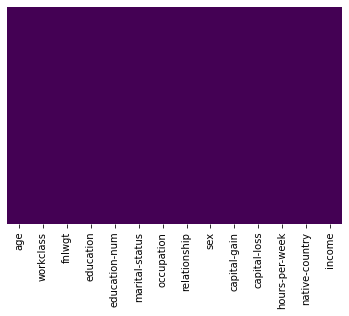

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

After examining the unique values in each column of the dataset, it is evident that most columns contain accurate unique values. However, the 'workclass', 'occupation', and 'native-country' columns exhibit the presence of '?' symbols among their unique values. 

Despite the dataset reporting no missing values through the **df.isnull().sum()** command, it's crucial to note the presence of **'?'** symbols in these categorical columns. Given their categorical nature, replacing **'?'** with NaN or using mean values for imputation isn't appropriate. Instead, we opted to replace **'?'** with **'Unknown'**. This approach ensures that the dataset remains consistent and complete, thereby preserving data integrity for subsequent exploratory and modeling analyses.

In [11]:
df.replace('?', 'Unknown', inplace=True)

In [12]:
df.head()

age workclass  fnlwgt     education  education-num marital-status  \
0   90   Unknown   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66   Unknown  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship     sex  capital-gain  capital-loss  \
0            Unknown  Not-in-family  Female             0          4356   
1    Exec-managerial  Not-in-family  Female             0          4356   
2            Unknown      Unmarried  Female             0          4356   
3  Machine-op-inspct      Unmarried  Female             0          3900   
4     Prof-specialty      Own-child  Female             0          3900   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              18  United-States  <=50K  
2              40  United-States  <=50K  
3              40  United-States  <=50K  
4              40  United-States  <=50K

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  income          32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


We could see that there are no missing values in the dataset

### Checking for Duplicated Rows in a DataFrame

In data analysis, it's essential to identify and handle duplicate rows in your dataset. Duplicate rows can affect the integrity of your analysis and model performance and can also skew analysis and lead to incorrect conclusions.. The following code snippet demonstrates how to check for duplicated rows in a DataFrame and display the first few duplicated rows.

In [14]:
df.duplicated().value_counts()

False    32537
True        24
Name: count, dtype: int64

In [15]:
# Check for duplicated rows
duplicate_rows = df[df.duplicated()]

# Display the first duplicated row
print(duplicate_rows.head(5))

       age workclass  fnlwgt     education  education-num marital-status  \
8453    25   Private  308144     Bachelors             13  Never-married   
8645    90   Private   52386  Some-college             10  Never-married   
12202   21   Private  250051  Some-college             10  Never-married   
14346   20   Private  107658  Some-college             10  Never-married   
15603   25   Private  195994       1st-4th              2  Never-married   

            occupation   relationship     sex  capital-gain  capital-loss  \
8453      Craft-repair  Not-in-family    Male             0             0   
8645     Other-service  Not-in-family    Male             0             0   
12202   Prof-specialty      Own-child  Female             0             0   
14346     Tech-support  Not-in-family  Female             0             0   
15603  Priv-house-serv  Not-in-family  Female             0             0   

       hours-per-week native-country income  
8453               40         Mexi

The output above displays the first 5 duplicated rows identified in the DataFrame df. Each row corresponds to an instance where all columns in the DataFrame have identical values to another row, indicating a duplicate entry. 

In [16]:
def duplicate_values(df):
    print("Duplicate check...")
    num_duplicates = df.duplicated(subset=None, keep='first').sum()
    if num_duplicates > 0:
        print("There are", num_duplicates, "duplicated observations in the dataset.")
        df.drop_duplicates(keep='first', inplace=True)
        print(num_duplicates, "duplicates were dropped!")
        print("No more duplicate rows!")
    else:
        print("There are no duplicated observations in the dataset.")

duplicate_values(df)

Duplicate check...
There are 24 duplicated observations in the dataset.
24 duplicates were dropped!
No more duplicate rows!


The outcome of running the **'duplicate_values()'** function on the dataset was successful in identifying and removing 24 duplicated observations. This process ensures that the DataFrame **'df'** now contains only unique rows, effectively eliminating any potential biases or inaccuracies that could arise from duplicate entries. By dropping these duplicates using the **'drop_duplicates()'** method with **'keep='first''**, the function has enhanced the integrity and reliability of the dataset for subsequent data analysis tasks. This approach is essential in maintaining data quality, as it ensures that each observation is distinct and contributes uniquely to the dataset, thereby enabling more accurate and reliable insights to be derived from the data.

### Handling Redundant Features: 

#### 1. Educational-num

In our dataset, we have two columns that convey similar information: education and educational-num. The education column contains string values representing different education levels, while the educational-num column contains corresponding numerical values. As we can see, each education level from the education column corresponds to a unique numerical value in the educational-num column. For example:

- All HS-grad entries in education are represented as 9 in educational-num.
- All Masters entries in education are represented as 14 in educational-num.

Since both columns convey the same information, we can remove the educational-num column to avoid redundancy. This simplifies our dataset and reduces multicollinearity, making the model more efficient and easier to interpret.

In [17]:
df['education'].unique()

array(['HS-grad', 'Some-college', '7th-8th', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'],
      dtype=object)

In [18]:
df['education-num'].unique()

array([ 9, 10,  4,  6, 16, 15, 13, 14,  7, 12, 11,  2,  3,  8,  5,  1],
      dtype=int64)

#### 2. Capital-gain and Capital-loss:

The capital-gain and capital-loss columns contain financial information about gains and losses. However, 75% of the data in these columns are zeros, making them less informative for our analysis. Therefore, we will drop these columns to simplify the dataset.

Text(0.5, 1.0, 'Histogram')

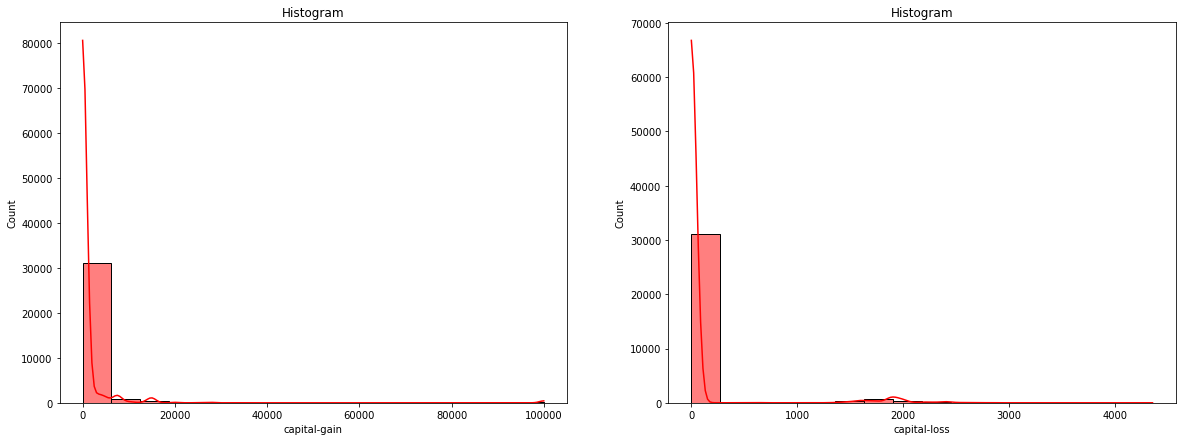

In [19]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
sns.histplot(df['capital-gain'], kde = True,color='r')
plt.title('Histogram')
plt.subplot(1, 2, 2)
sns.histplot(df['capital-loss'], kde = True,color='r')
plt.title('Histogram')

In [20]:
df.head()

age workclass  fnlwgt     education  education-num marital-status  \
0   90   Unknown   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66   Unknown  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship     sex  capital-gain  capital-loss  \
0            Unknown  Not-in-family  Female             0          4356   
1    Exec-managerial  Not-in-family  Female             0          4356   
2            Unknown      Unmarried  Female             0          4356   
3  Machine-op-inspct      Unmarried  Female             0          3900   
4     Prof-specialty      Own-child  Female             0          3900   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              18  United-States  <=50K  
2              40  United-States  <=50K  
3              40  United-States  <=50K  
4              40  United-States  <=50K

In [21]:
# Dropping the redundant columns
df = df.drop(['education-num', 'capital-gain', 'capital-loss'], axis=1)

In [22]:
df.head()


age workclass  fnlwgt     education marital-status         occupation  \
0   90   Unknown   77053       HS-grad        Widowed            Unknown   
1   82   Private  132870       HS-grad        Widowed    Exec-managerial   
2   66   Unknown  186061  Some-college        Widowed            Unknown   
3   54   Private  140359       7th-8th       Divorced  Machine-op-inspct   
4   41   Private  264663  Some-college      Separated     Prof-specialty   

    relationship     sex  hours-per-week native-country income  
0  Not-in-family  Female              40  United-States  <=50K  
1  Not-in-family  Female              18  United-States  <=50K  
2      Unmarried  Female              40  United-States  <=50K  
3      Unmarried  Female              40  United-States  <=50K  
4      Own-child  Female              40  United-States  <=50K

#  Feature Engineering

Feature engineering plays a pivotal role in the data preprocessing phase of machine learning and data analysis. It involves creating new features or modifying existing ones to improve the performance of predictive models.

## Categorizing Ages
To simplify our analysis and acquire a better understanding of demographic patterns, we shall divide ages into several categories. This categorization helps us understand the distribution of age groups and shows how the population is divided into different life stages.

In our Census collection, it is critical to fully comprehend the age demographics. By categorizing ages as 'Young', 'Adult', 'Middle-Aged', 'Senior', and 'Elderly', we may rapidly determine which age groups are prevalent and how they are dispersed. This categorization, like arranging data into distinct parts for clarity, enhances demographic analysis and helps people make informed judgments.

## Implementing Age Categorization
We will add a new column to our DataFrame to categorize different age groups. Here's how we can do it:

1. **Define Age Ranges**:
- We will determine specific age ranges for each category.
- Example categories:
 - **'Young'**: Ages from 0 to 18
 - **'Adult'**: Ages from 18 to 35
 - **'Middle-Aged'**: Ages from 35 to 55
 - **'Senior'**: Ages from 55 to 75
 - **'Elderly'**: Ages from 75 to 100

2. **Create the Age_Category Feature**:

- Utilizing pd.cut, we will assign each age to one of these categories.

In [23]:
#Let's add a new column to categorise the different ages
age_bins = [0, 18, 35, 55, 75, 100]
age_labels = ['Young', 'Adult', 'Middle-Aged', 'Senior', 'Elderly']

# Categorize 'age' column into bins
df['age_category'] = pd.cut(df['age'], age_bins, labels=age_labels, right=False)

# Display the DataFrame with the new 'age_category' column
df.head()

age workclass  fnlwgt     education marital-status         occupation  \
0   90   Unknown   77053       HS-grad        Widowed            Unknown   
1   82   Private  132870       HS-grad        Widowed    Exec-managerial   
2   66   Unknown  186061  Some-college        Widowed            Unknown   
3   54   Private  140359       7th-8th       Divorced  Machine-op-inspct   
4   41   Private  264663  Some-college      Separated     Prof-specialty   

    relationship     sex  hours-per-week native-country income age_category  
0  Not-in-family  Female              40  United-States  <=50K      Elderly  
1  Not-in-family  Female              18  United-States  <=50K      Elderly  
2      Unmarried  Female              40  United-States  <=50K       Senior  
3      Unmarried  Female              40  United-States  <=50K  Middle-Aged  
4      Own-child  Female              40  United-States  <=50K  Middle-Aged

In [24]:
# Correlation matrix
numeric_df = df[['age', 'fnlwgt', 'hours-per-week']]
correlation_matrix = numeric_df.corr()


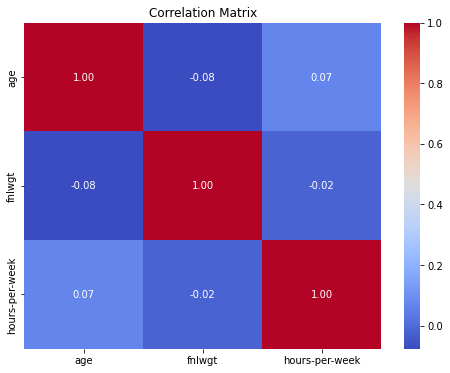

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()


#  Exploratory Data Analysis
##  Univariate Analysis
### Variable- Income Distribution

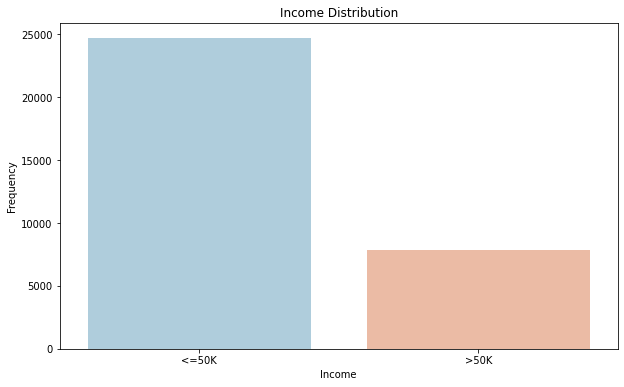

In [26]:
#Variable- Income Distribution with countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='income',palette='RdBu_r')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()



The bar chart illustrates the income distribution within the dataset. The x-axis categorizes income into two groups: those earning less than or equal to 50,000 (<=50K) and those earning more than 50,000 (>50K). The y-axis measures the frequency, representing the number of individuals within each income category.

The chart reveals a significant disparity between the two income groups. The majority of individuals, as indicated by the taller blue bar, fall into the <=50K income category. This suggests that most individuals in the dataset earn 50,000 or less. In contrast, the frequency of individuals earning more than 50,000 is markedly lower, as depicted by the shorter orange bar.

The distribution highlights a pronounced income inequality, with a substantial concentration of individuals earning within the lower income bracket. This skewed distribution suggests that higher incomes are less common among the individuals represented in this dataset.

In summary, the income distribution chart clearly shows that the dataset predominantly consists of individuals earning $50,000 or less, with a smaller proportion of higher earners, emphasizing the income disparity within the population.

### Variable- Age Distribution

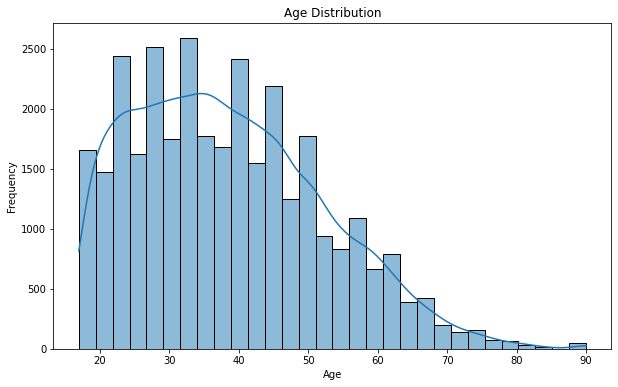

In [27]:
#Variable- Age Distribution with Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

The histogram illustrates the age distribution within the dataset. The x-axis represents the age of individuals, ranging from approximately 20 to 90 years, while the y-axis shows the frequency or count of individuals in each age bracket.

The chart reveals a significant concentration of individuals between 25 and 45 years old, with the highest frequency observed in the 30-35 age group. This suggests that the majority of individuals fall within this age range. The distribution exhibits a right skew, indicating a larger number of younger individuals and fewer older individuals, extending up to 90 years.

A smooth curve overlaying the bars highlights the overall distribution pattern, with a peak at the 30-35 age group followed by a decline in frequency as age increases. The extended tail on the right signifies the presence of older individuals, albeit in smaller numbers compared to those aged 25-45.

In summary, the histogram clearly indicates a substantial concentration of individuals in the younger to middle-age categories, with fewer older individuals. The skewness and curve shape underscore the asymmetrical nature of the age distribution, with a notable presence of older age outliers.


### Variable- Hours-per-week Distribution

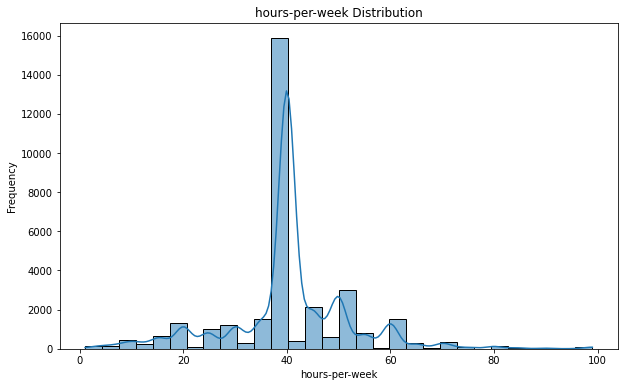

In [28]:
#Variable- hours-per-week Distribution with Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='hours-per-week', bins=30, kde=True)
plt.title('hours-per-week Distribution')
plt.xlabel('hours-per-week')
plt.ylabel('Frequency')
plt.show()

The chart reveals a notable peak at the 40-hour mark, indicating that a significant number of individuals work around 40 hours per week. The distribution has a steep rise and fall around this peak, showing a high concentration of individuals working standard full-time hours. There are smaller peaks at other hour intervals, but they are significantly less frequent compared to the 40-hour workweek.

The overlaid smooth curve emphasizes the sharp peak at 40 hours and the subsequent drop-off in frequency as the number of hours worked per week moves away from this central value. The distribution shows a long tail extending towards higher numbers of hours worked, though these are much less common.

Overall, the chart demonstrates that the majority of individuals in the dataset work around 40 hours per week, with fewer individuals working either significantly more or fewer hours.

### Variable- Other Categorical Columns Distribution

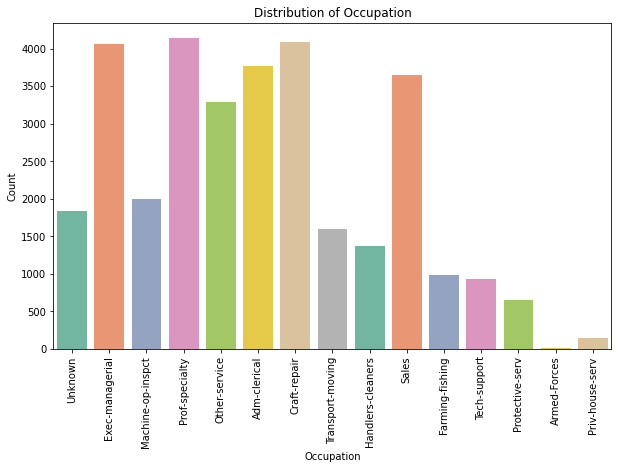

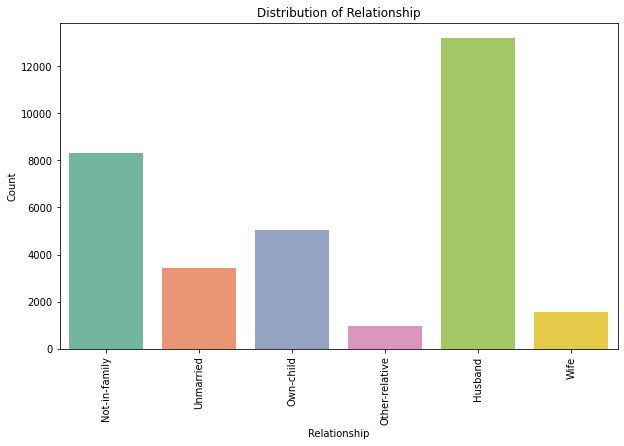

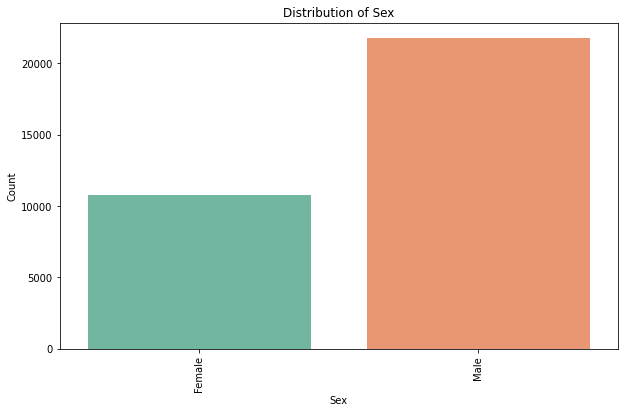

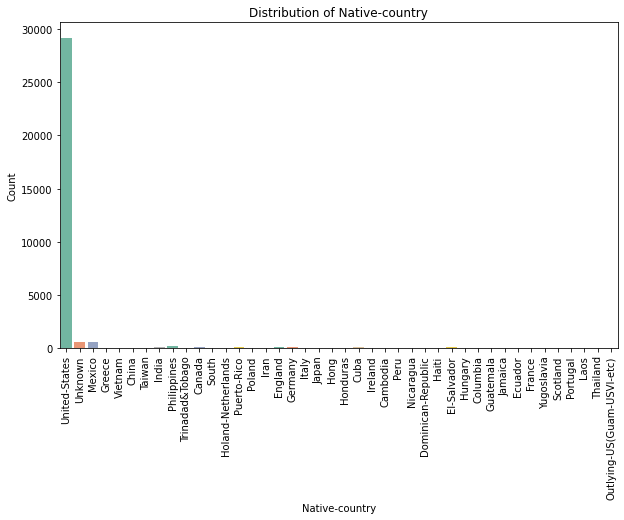

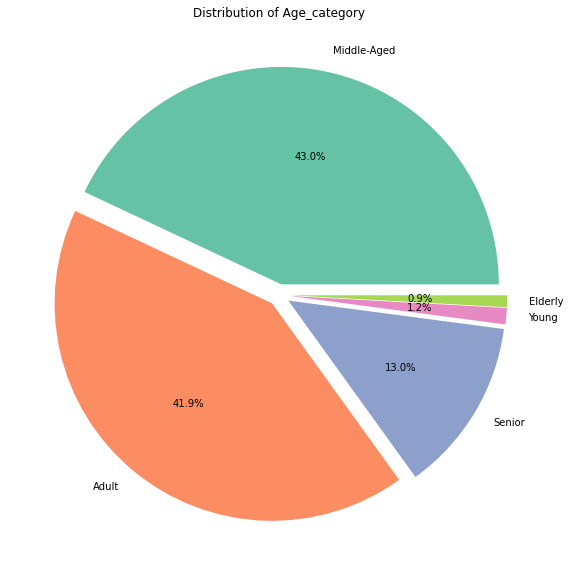

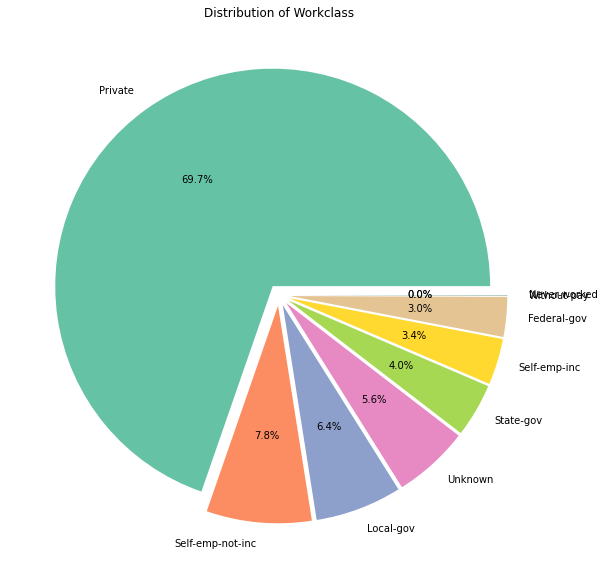

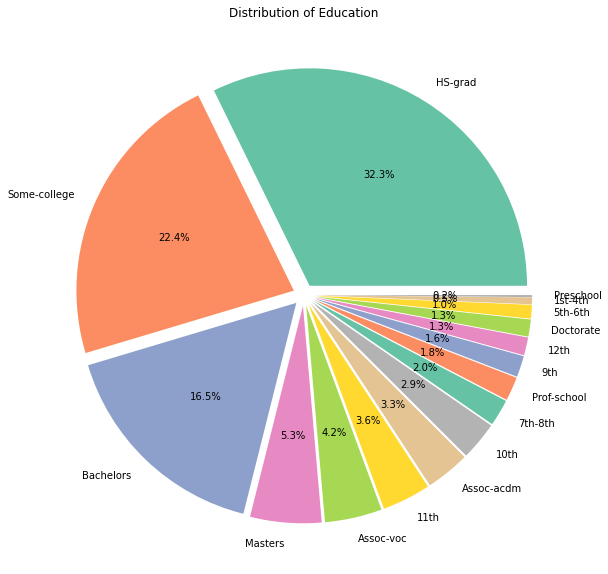

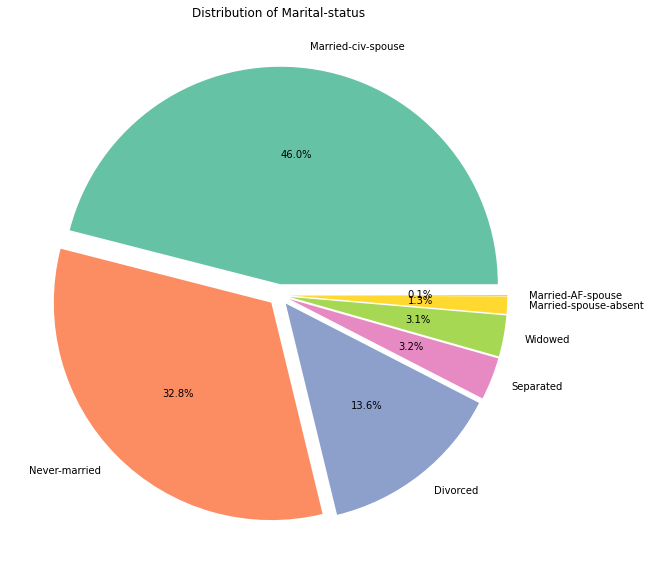

In [29]:
def plot_visualizations(df, count_plot_columns, pie_chart_columns):
    # Plotting count plots
    for column in count_plot_columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=column, data=df, palette='Set2')
        plt.title(f'Distribution of {column.capitalize()}')
        plt.xlabel(column.capitalize())
        plt.ylabel('Count')
        plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
        plt.show()
    
    # Plotting pie charts
    for column in pie_chart_columns:
        plt.figure(figsize=(12, 10))  # Adjusted figure size for larger pie chart
        data = df[column].value_counts()
        # Calculate explode values to spread out the slices
        explode = [0.05] * len(data)
        plt.pie(data, labels=data.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'), explode=explode)
        plt.title(f'Distribution of {column.capitalize()}')
        plt.show()

# Columns to plot using count plots
count_plot_columns = ['occupation', 'relationship', 'sex', 'native-country']

# Columns to plot using pie charts
pie_chart_columns = ['age_category', 'workclass', 'education', 'marital-status']

# Plotting visualizations
plot_visualizations(df, count_plot_columns, pie_chart_columns)


The above visualizations provide insights into the distribution of various categorical variables in the dataset.

### Count Plots
**Distribution of Occupation:**
The most common occupations are "Exec-managerial," "Prof-specialty," "Adm-clerical," "Craft-repair," and "Sales."
Other notable occupations include "Other-service" and "Machine-op-inspct."

**Distribution of Relationship:**
The majority of individuals are labeled as "Husband," followed by "Not-in-family," "Own-child," and "Wife."
There are fewer individuals categorized as "Other-relative" and "Unmarried."

**Distribution of Sex:**
There is a higher count of males compared to females in the dataset.

**Distribution of Native-country:**
The vast majority of individuals are from the "United States," with very few from other countries, indicating a highly US-centric dataset.

### Pie Charts

**Distribution of Age Category:**
The dataset predominantly consists of "Middle-Aged" and "Adult" individuals, with smaller proportions of "Senior," "Young," and "Elderly."

**Distribution of Workclass:**
Most individuals are employed in the "Private" sector, followed by "Self-emp-not-inc," "Local-gov," and "State-gov."
Other work classes have very small representations.

**Distribution of Education:**
"HS-grad" is the most common education level, followed by "Some-college" and "Bachelors."
There is a diverse range of education levels, including advanced degrees and lower education levels.

**Distribution of Marital-status:**
The largest group is "Married-civ-spouse," followed by "Never-married."
Other categories such as "Divorced," "Widowed," and "Separated" have smaller representations.

These visualizations help in understanding the demographic and socio-economic characteristics of the individuals in the dataset, highlighting key areas such as occupation types, relationship statuses, gender distribution, native countries, age categories, work classes, education levels, and marital statuses.

In [30]:
# plotting every feature (interactive)
# Filter out categorical columns only
filtered_columns = [col for col in df.columns if df[col].dtype in ['object', 'category']] 

# Create Dash app
app = dash.Dash(__name__)

# Define app layout
app.layout = html.Div([
    dcc.Dropdown(
        id='feature-dropdown',
        options=[{'label': col, 'value': col} for col in filtered_columns],
        value=filtered_columns[0] if filtered_columns else None
    ),
    dcc.Graph(id='feature-distribution')
])

# Define callback to update the plot based on selected feature
@app.callback(
    Output('feature-distribution', 'figure'),
    [Input('feature-dropdown', 'value')]
)
def update_distribution(selected_feature):
    if selected_feature:
        # Calculate value counts for the selected feature
        feature_counts = df[selected_feature].value_counts().reset_index()
        feature_counts.columns = ['category', 'count']

        # Create bar plot
        fig = px.bar(feature_counts, x='category', y='count', barmode='group')
        fig.update_layout(title=f"Distribution of {selected_feature}")
        return fig
    else:
        # If no feature selected, return empty plot
        return go.Figure()

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

##  Bivariate Analysis
### Bivariate Analysis of Income with Various Categorical Variables

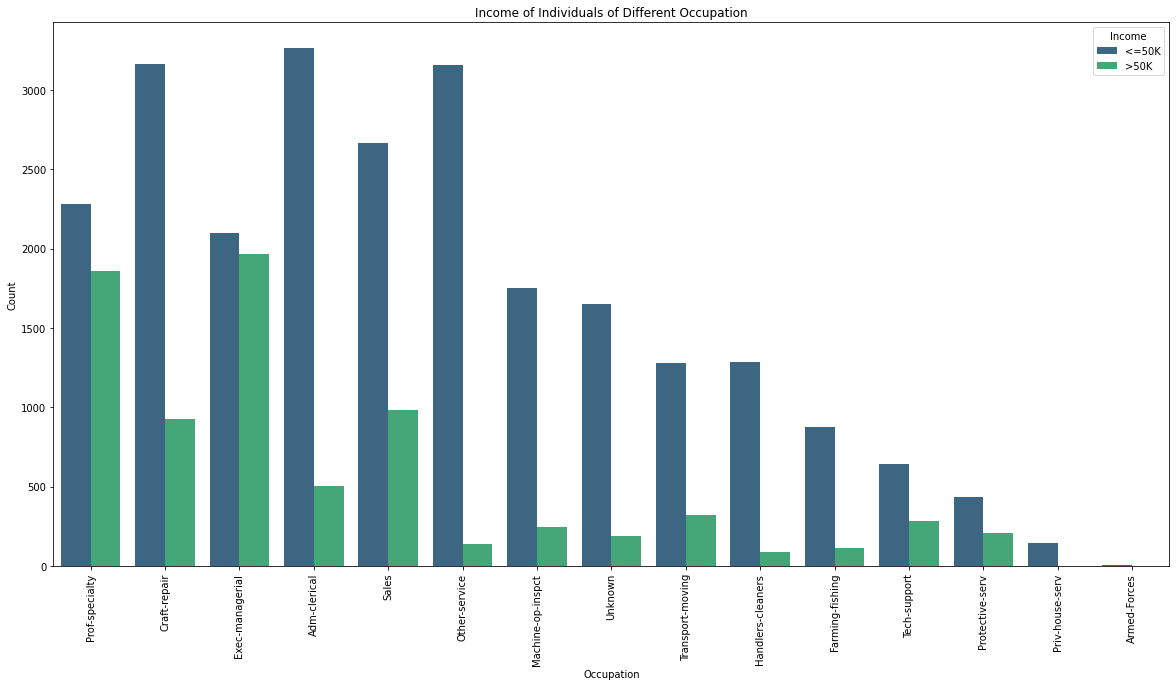

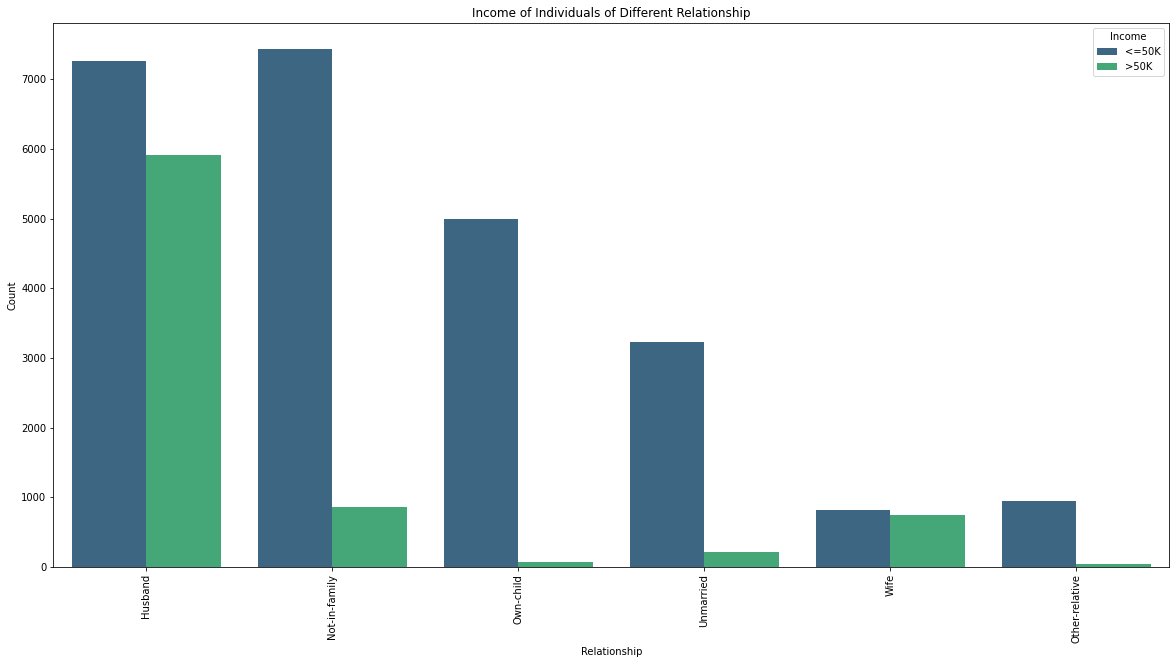

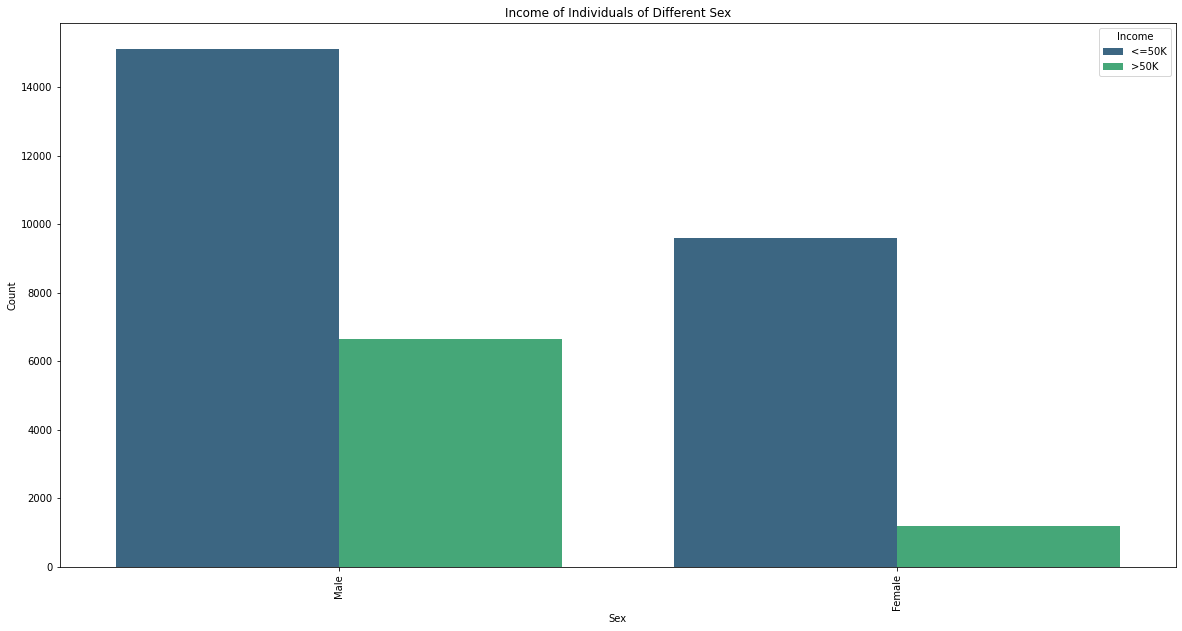

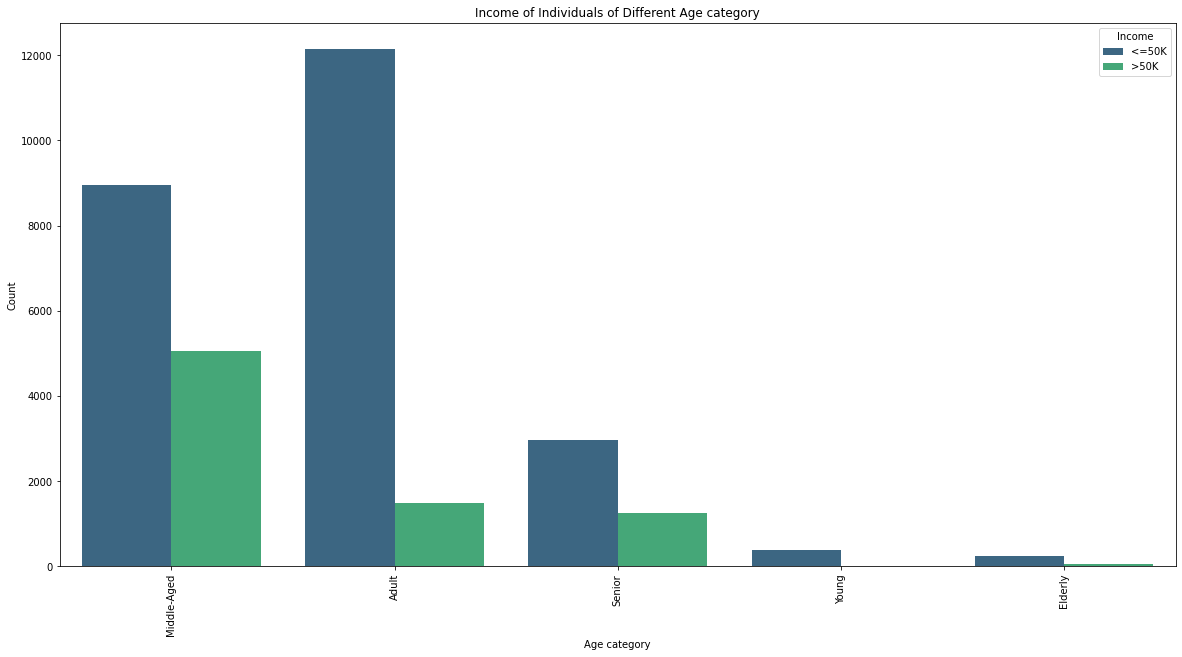

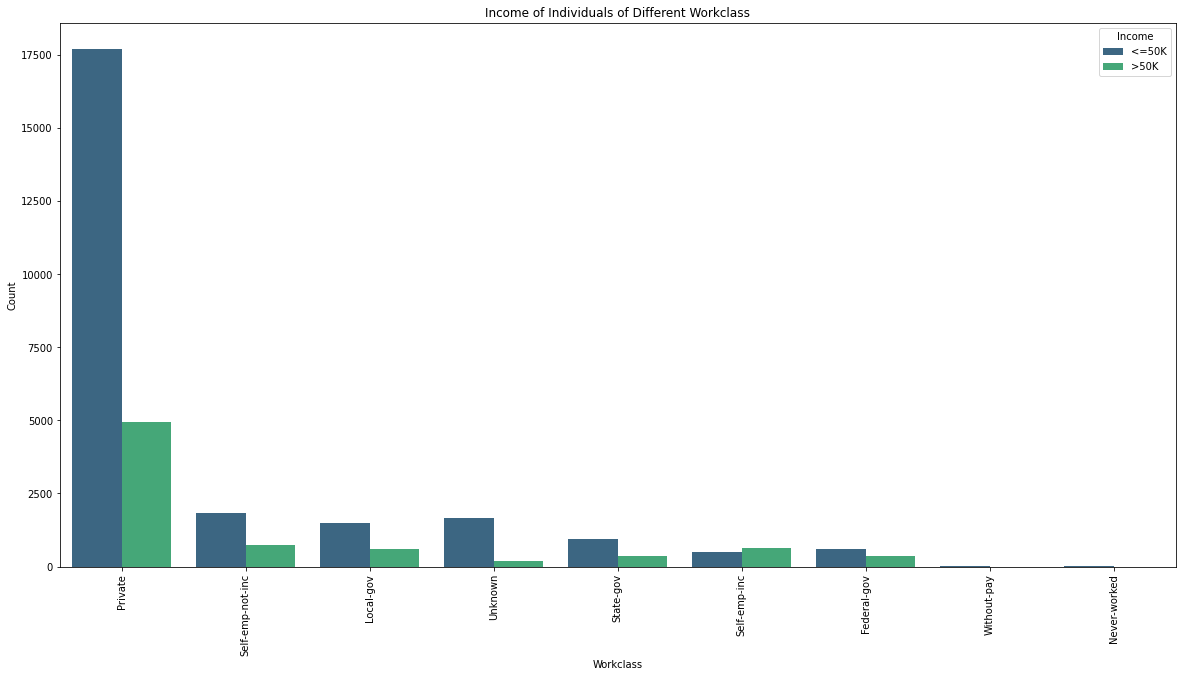

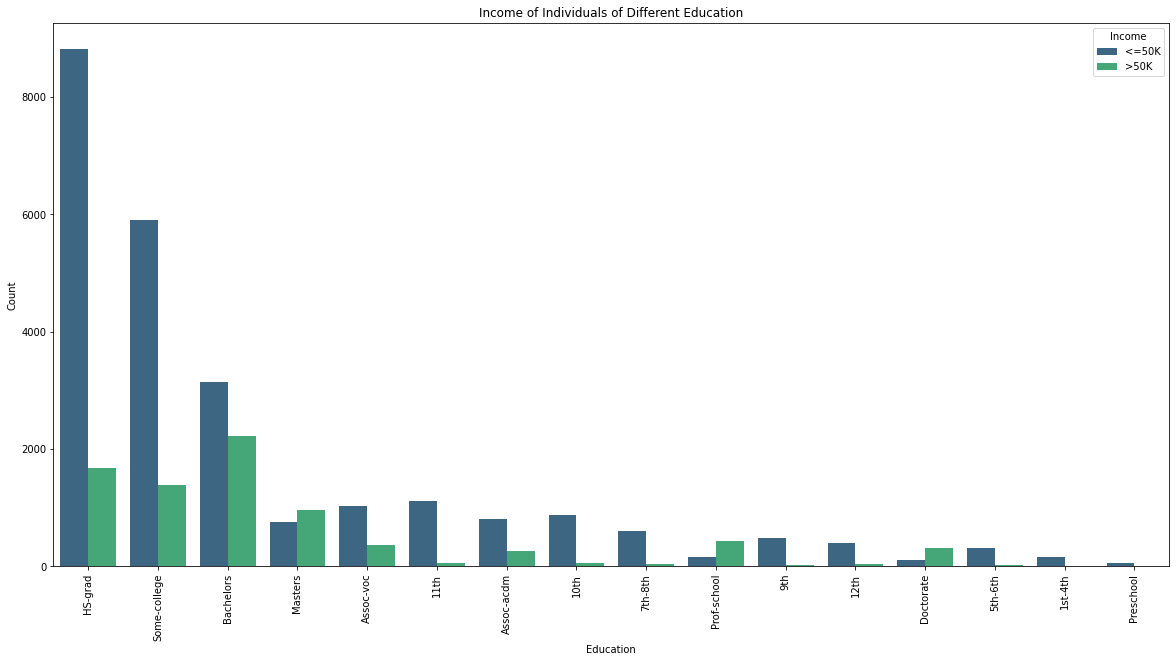

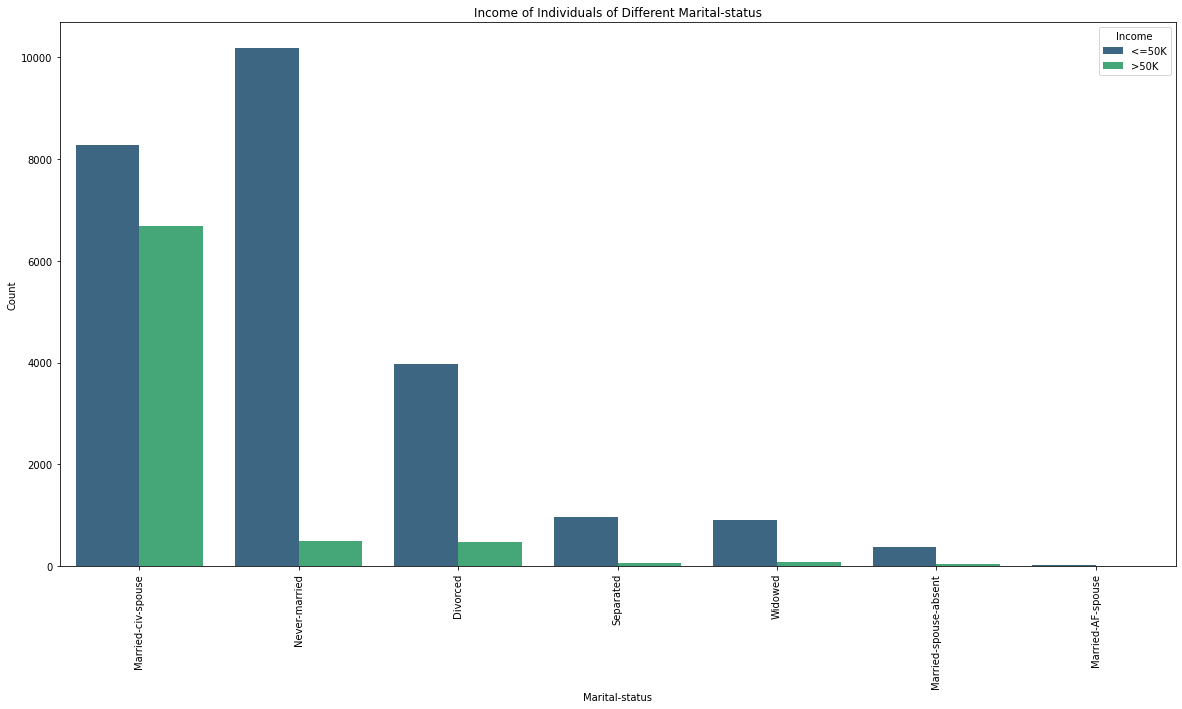

In [31]:
def bivariate_analysis(df, income_column, analysis_columns):
    for column in analysis_columns:
        plt.figure(figsize=(20, 10))
        sns.countplot(x=column, hue=income_column, data=df, palette='viridis', order=df[column].value_counts().index)
        plt.title(f'Income of Individuals of Different {column.replace("_", " ").capitalize()}')
        plt.xlabel(column.replace("_", " ").capitalize())
        plt.ylabel('Count')
        plt.legend(title=income_column.capitalize())
        plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
        plt.show()

# Columns to analyze against income
analysis_columns = ['occupation', 'relationship', 'sex', 'age_category', 'workclass', 
                    'education', 'marital-status']

# Run bivariate analysis
bivariate_analysis(df, 'income', analysis_columns)



The above visualizations show the distribution of income across various categorical variables, providing insights into how different factors relate to income levels.

**Income of Individuals of Different Occupation**

- Professional Specialty and Executive Managerial:
Higher income (>50K) is significantly represented, indicating that professional and managerial roles often offer higher pay.
- Craft Repair and Sales:
Noticeable number of individuals with higher income, but still a larger proportion in the lower income (<=50K) category.
- Other Services and Handlers Cleaners:
Dominated by lower income (<=50K), reflecting that service-related and manual labor jobs tend to have lower wage scales.

**Income of Individuals of Different Relationship**

- Husband and Wife:
Significant proportion in the higher income (>50K) category, suggesting dual incomes or stable, higher-paying jobs within married households.
- Not-in-family and Own-child:
Predominantly in the lower income (<=50K) category, indicating dependents or non-family individuals tend to have lower earnings.

**Income of Individuals of Different Sex**

- Males:
Higher proportion of individuals earning more than 50K compared to females.
Reflects gender disparity in earnings, with males tending to earn more.
- Females:
More evenly distributed but with a noticeable skew towards lower income (<=50K).

**Income of Individuals of Different Age Category**

- Middle-aged and Adult:
Higher representation in the higher income (>50K) category, suggesting that peak earning potential occurs in these age groups due to experience and career progression.
- Young and Senior:
Majority fall within the lower income (<=50K) category, reflecting early career stages or lesser experience impacting income levels.

**Income of Individuals of Different Workclass**

- Private Sector:
Predominantly falls within the lower income (<=50K) category.
More than 75% of private sector employees earn less than 50K annually, indicating lower wage scales.
- Self-Employed (not-inc):
Only category where individuals earning more than 50K exceed those earning less.
Suggests self-employment can lead to higher earnings if successful.
- Federal Government:
Small difference between the number of people earning more or less than 50K.
Indicates more uniform income distribution within federal jobs.
- Without-pay and Never-worked:
Hardly contain any data, reflecting minimal income or lack of income data in these categories.

**Income of Individuals of Different Education**

- Higher Education (Doctorate, Masters, Bachelors):
Significant proportion of individuals earning more than 50K.
Indicates higher education correlates with higher income levels.
- Lower Education (HS-grad, Some-college):
Mostly associated with lower income (<=50K).
Suggests lower education levels are linked to lower-paying jobs.

**Income of Individuals of Different Marital Status**

- Married-civ-spouse:
Highest representation in the higher income (>50K) category.
Indicates dual incomes or stable, higher-paying jobs within this group.
- Never-married, Divorced, Widowed:
Predominantly in the lower income (<=50K) category.
Reflects single-income households or unstable economic conditions post-divorce or widowhood.

These visualizations provide a comprehensive view of how various demographic and socio-economic factors relate to income levels, highlighting the disparity in income distribution across different categories.


# Task 2: Use appropriate methods to handle categorical data


Before building a machine learning model, it is essential to handle categorical data appropriately. Categorical variables are those that contain label values rather than numerical values. These variables can pose a challenge for machine learning algorithms, which typically require numerical input. Here, we will discuss the appropriate methods to handle categorical data:

## 1. Label Encoding
Label encoding converts categorical text data into numerical data. Each unique value in a categorical column is assigned a unique integer. This method is particularly useful for ordinal data, where the order of values is meaningful. 

a. The target variable (**'income'**) will be label encoded into numerical format.

When using **LabelEncoder** to transform the **income** column, the encoder assigns integer values based on the alphabetical order of the labels. In the case of the **income** column, which has two possible values (**<=50K** and **>50K**), the encoder will assign the labels as follows:

- **<=50K** (lower income) will be encoded as **0**
- **>50K** (higher income) will be encoded as **1**

Here's the code below to verify and display the mapping of the encoded values:

b. **education column** has an inherent order from less to more advanced levels of education.These categories have a meaningful order (e.g., High School < Bachelors < Masters < Doctorate).

c. **age_category column** based on age ranges (e.g., 20-29, 30-39).These categories have a meaningful order based on age progression.

In [32]:



# Initialize the label encoder
label_encoder = LabelEncoder()

# List of columns to encode
ordinal_data = ['income', 'education', 'age_category']

# Apply LabelEncoder to each column in the list
df[ordinal_data] = df[ordinal_data].apply(label_encoder.fit_transform)



In [33]:
df[ordinal_data].head()

income  education  age_category
0       0         11             1
1       0         11             1
2       0         15             3
3       0          5             2
4       0         15             2

## 2. One-Hot Encoding
One-hot encoding creates binary columns for each category in a categorical variable. This method is suitable for nominal data, where there is no meaningful order among the categories. It avoids the problem of ordinality introduced by label encoding.We will identify the categorical variables that need to be encoded and then use ColumnTransformer and OneHotEncoder from sklearn to handle the one-hot encoding of categorical variables.

In [34]:
categorical_columns = ['workclass',  'marital-status', 
                       'occupation', 'relationship', 'sex', 'native-country']

# Define the column transformer
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ],
    remainder='passthrough'
)

# Apply the column transformer to the DataFrame and convert to dense array
df_encoded = column_transformer.fit_transform(df).toarray()

# Convert the resulting array back to a DataFrame
new_columns = column_transformer.named_transformers_['cat'].get_feature_names_out(categorical_columns)
remaining_columns = [col for col in df.columns if col not in categorical_columns]
all_columns = list(new_columns) + remaining_columns

df_encoded = pd.DataFrame(df_encoded, columns=all_columns)

# Verify the encoded data
df_encoded.head()

workclass_Local-gov  workclass_Never-worked  workclass_Private  \
0                  0.0                     0.0                0.0   
1                  0.0                     0.0                1.0   
2                  0.0                     0.0                0.0   
3                  0.0                     0.0                1.0   
4                  0.0                     0.0                1.0   

   workclass_Self-emp-inc  workclass_Self-emp-not-inc  workclass_State-gov  \
0                     0.0                         0.0                  0.0   
1                     0.0                         0.0                  0.0   
2                     0.0                         0.0                  0.0   
3                     0.0                         0.0                  0.0   
4                     0.0                         0.0                  0.0   

   workclass_Unknown  workclass_Without-pay  marital-status_Married-AF-spouse  \
0                1.0                    0.0                               0.0   
1                0.0                    0.0                               0.0   
2                1.0                    0.0                               0.0   
3                0.0                    0.0                               0.0   
4                0.0                    0.0                               0.0   

   marital-status_Married-civ-spouse  ...  native-country_United-States  \
0                                0.0  ...                           1.0   
1                                0.0  ...                           1.0   
2                                0.0  ...                           1.0   
3                                0.0  ...                           1.0   
4                                0.0  ...                           1.0   

   native-country_Unknown  native-country_Vietnam  native-country_Yugoslavia  \
0                     0.0                     0.0                        0.0   
1                     0.0                     0.0                        0.0   
2                     0.0                     0.0                        0.0   
3                     0.0                     0.0                        0.0   
4                     0.0                     0.0                        0.0   

    age    fnlwgt  education  hours-per-week  income  age_category  
0  90.0   77053.0       11.0            40.0     0.0           1.0  
1  82.0  132870.0       11.0            18.0     0.0           1.0  
2  66.0  186061.0       15.0            40.0     0.0           3.0  
3  54.0  140359.0        5.0            40.0     0.0           2.0  
4  41.0  264663.0       15.0            40.0     0.0           2.0  

[5 rows x 81 columns]

In [35]:
df_encoded.columns

Index(['workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Unknown', 'workclass_Without-pay',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'occupation_Unknown',
       'relationship_Not-in-family', 'relationship_Other-relative',
       'relationship_Own-child', 'relationship_Unmar

- One-Hot Encoding: Only applied to the specified categorical columns (workclass, education, marital-status, occupation, relationship, sex, native-country, and age_category).
- Column Transformer: The remainder='passthrough' parameter ensures that all other columns (age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week) remain unchanged.
- Rebuild DataFrame: The transformed data is converted back to a DataFrame with appropriate column names.
This approach ensures that the one-hot encoding is applied correctly to the specified categorical columns, while the other columns remain unchanged.

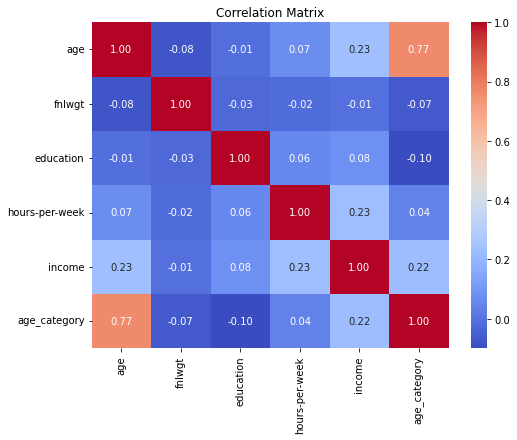

In [36]:
# Correlation matrix
numericdf = df_encoded[['age', 'fnlwgt', 'education',
       'hours-per-week', 'income', 'age_category']]
correlation_matrix = numericdf.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

# Task 3: Investigation and Training of Machine Learning Models

In this section, the dataset is prepared for machine learning by splitting it into training and testing sets. The target variable is defined as **income**, which indicates whether an individual's annual income is greater than $50,000 or not. The feature variables include all other columns in the DataFrame after encoding, such as **age**, **workclass**, **education**, **marital-status**, **occupation**, **relationship**, **sex**, **native-country**, and **age_category**.

## Splitting the Data

The features (**X**) and the target variable (**y**) are separated from the DataFrame:

- **X** contains all feature variables except for the target variable income.
- **y** contains the target variable income.

In [37]:
# Split the data into features and target variable
X = df_encoded.drop(columns=['income'])
y = df_encoded['income']

# Print the shape of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (32537, 80)
Shape of y: (32537,)


## Creating Training and Testing Sets
The data is divided into training and testing sets using an 80-20 split. This ensures that 80% of the data is used to train the model, and 20% is reserved for testing its performance. A random seed is set to 42 for reproducibility, ensuring that the data is split the same way each time the code is run.

In [38]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (26029, 80)
Shape of X_test: (6508, 80)
Shape of y_train: (26029,)
Shape of y_test: (6508,)


## Standardizing the Features
Standardization is applied to the feature variables to ensure they have a mean of 0 and a standard deviation of 1. This step is crucial for many machine learning algorithms to perform optimally. The StandardScaler from scikit-learn is used for this purpose:

- The scaler is fitted on the training data and then used to transform both the training and testing sets.

In [39]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train[0]

array([-0.26150025, -0.01640132, -1.51679247,  5.31470295, -0.29013837,
       -0.20604039, -0.24279696, -0.02147643, -0.02773021,  1.08660656,
       -0.11555768, -0.699155  , -0.17853051, -0.17898825, -0.01640132,
       -0.38163151, -0.37692655,  5.62297025, -0.20856039, -0.25660275,
       -0.33383824, -0.06661648, -0.38242387, -0.14375342, -0.35244455,
       -0.16842539, -0.22890965, -0.24341739, -0.58123939, -0.17864504,
       -0.43233425, -0.34649214, -0.22573192,  0.70391036, -0.05955717,
       -0.04886354, -0.04114954, -0.05192841, -0.04886354, -0.02973905,
       -0.05824357, -0.05375619, -0.02630618, -0.06364197, -0.0310063 ,
       -0.0402019 , -0.03873728, -0.0061984 , -0.02056172, -0.02556452,
       -0.02147643, -0.0555245 , -0.03721543, -0.02630618, -0.04766395,
       -0.05041904, -0.04474115, -0.02319808, -0.14051814, -0.03396896,
       -0.02056172, -0.02702755, -0.07814873, -0.04161532, -0.03562901,
       -0.05723886, -0.01960445, -0.04886354, -0.03923153, -0.02

In [40]:
X_test[0]

array([-0.26150025, -0.01640132,  0.65928597, -0.18815727, -0.29013837,
       -0.20604039, -0.24279696, -0.02147643, -0.02773021,  1.08660656,
       -0.11555768, -0.699155  , -0.17853051, -0.17898825, -0.01640132,
       -0.38163151, -0.37692655, -0.17784195, -0.20856039,  3.89707442,
       -0.33383824, -0.06661648, -0.38242387, -0.14375342, -0.35244455,
       -0.16842539, -0.22890965, -0.24341739, -0.58123939, -0.17864504,
       -0.43233425, -0.34649214, -0.22573192,  0.70391036, -0.05955717,
       -0.04886354, -0.04114954, -0.05192841, -0.04886354, -0.02973905,
       -0.05824357, -0.05375619, -0.02630618, -0.06364197, -0.0310063 ,
       -0.0402019 , -0.03873728, -0.0061984 , -0.02056172, -0.02556452,
       -0.02147643, -0.0555245 , -0.03721543, -0.02630618, -0.04766395,
       -0.05041904, -0.04474115, -0.02319808, -0.14051814, -0.03396896,
       -0.02056172, -0.02702755, -0.07814873, -0.04161532, -0.03562901,
       -0.05723886, -0.01960445, -0.04886354, -0.03923153, -0.02

## Modelling and Evaluation

In this section, we evaluate various machine learning models before optimization, Classification models including Logistic Regression, K-Nearest Neighbors (KNN), Random Forest, clustering models including (K-Means, Hierarchical, and DBSCAN Clustering), and neural networks (simple feedforward and artificial neural networks). In this various models, I am going to predict if an individual is going to earn more $50,000 annually or not

## Classification Models

### Logistic Regression

Logistic Regression Test Accuracy: 0.8263675476336816
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.91      0.89      4988
         1.0       0.65      0.55      0.60      1520

    accuracy                           0.83      6508
   macro avg       0.76      0.73      0.74      6508
weighted avg       0.82      0.83      0.82      6508

Confusion Matrix:
 [[4541  447]
 [ 683  837]]


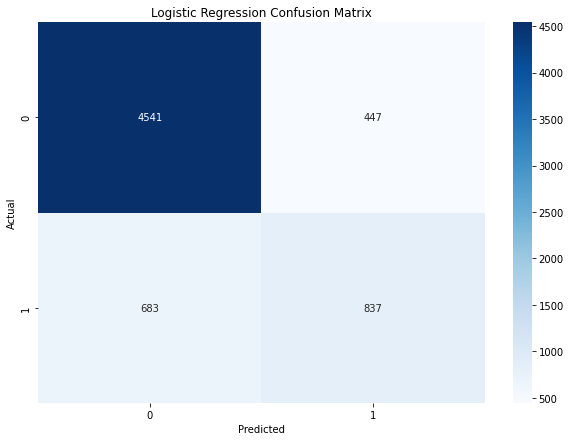

In [41]:
# Train Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict and evaluate
y_pred_logreg = logreg.predict(X_test)
logreg_test_score = accuracy_score(y_test, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

print(f"Logistic Regression Test Accuracy: {logreg_test_score}")
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred_logreg))

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### K-Nearest Neighbors (KNN)



KNN Test Accuracy: 0.816840811309158
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.89      0.88      4988
         1.0       0.61      0.58      0.60      1520

    accuracy                           0.82      6508
   macro avg       0.74      0.73      0.74      6508
weighted avg       0.81      0.82      0.81      6508

Confusion Matrix:
 [[4436  552]
 [ 640  880]]


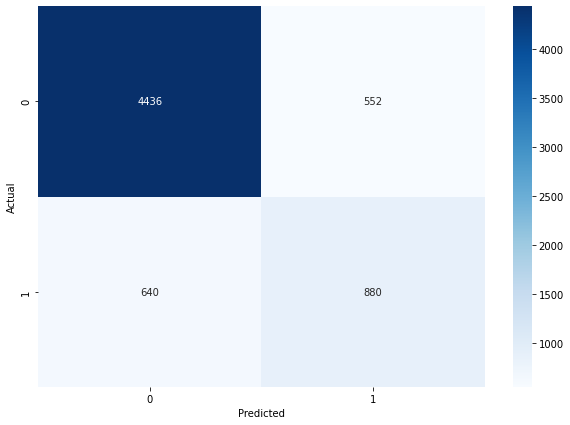

In [42]:
# Train KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred_knn = knn.predict(X_test)
knn_test_score = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print(f"KNN Test Accuracy: {knn_test_score}")
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred_knn))

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### Random Forest


Random Forest Test Accuracy: 0.8272894898586355
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      4988
         1.0       0.64      0.58      0.61      1520

    accuracy                           0.83      6508
   macro avg       0.76      0.74      0.75      6508
weighted avg       0.82      0.83      0.82      6508

Confusion Matrix:
 [[4502  486]
 [ 638  882]]


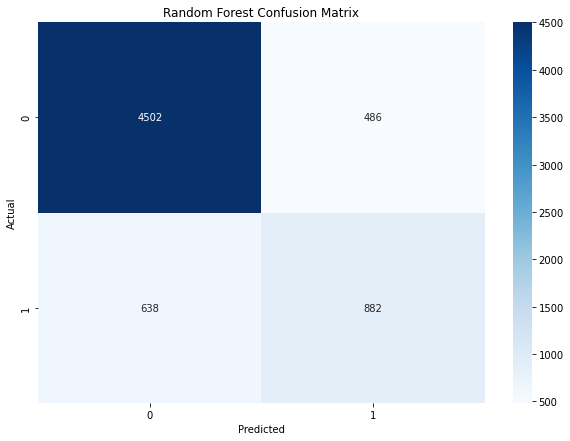

In [43]:
# Train Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf.predict(X_test)
rf_test_score = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print(f"Random Forest Test Accuracy: {rf_test_score}")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred_rf))

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Clustering Models

In our clustering models, we will be making use of the X dataframe gotten from the earlier df split. The response variable 'income' has already been dropped to ensure the clustering algorithm focuses on the feature space without any label information.

Features are standardized to ensure they contribute equally to the distance metric used by the clusering models while Principal Component Analysis (PCA) will be used to reduce the dimensionality of the data while retaining as much variance as possible. Here, it reduces the dataset to 2 dimensions for visualization purposes.

In [44]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Use PCA to reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

### K-Means Clustering



K-Means Clustering Silhouette Score for k=2: 0.460896231424836


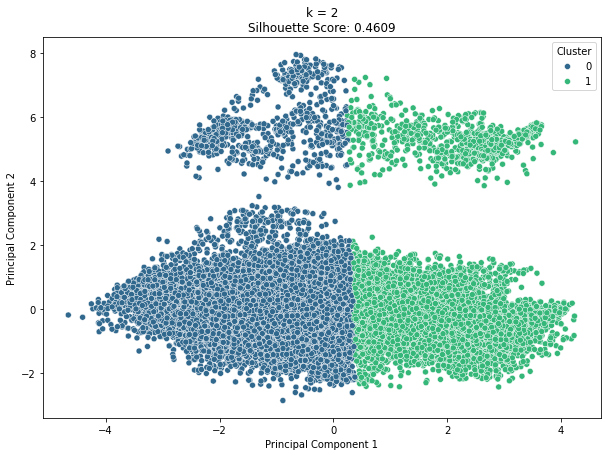

In [45]:
# Train K-Means Clustering model
#Create an instance of K Means model with 2 random clusters 
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
#fit the model to all the data except for the income label
clusters_kmeans = kmeans.fit_predict(X_pca)

# Compute silhouette score
kmeans_silhouette_score = silhouette_score(X_pca, clusters_kmeans)

print(f"K-Means Clustering Silhouette Score for k={n_clusters}: {kmeans_silhouette_score}")

# Plot clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters_kmeans, palette='viridis', legend='full')
plt.title(f'k = {n_clusters}\nSilhouette Score: {kmeans_silhouette_score:.4f}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


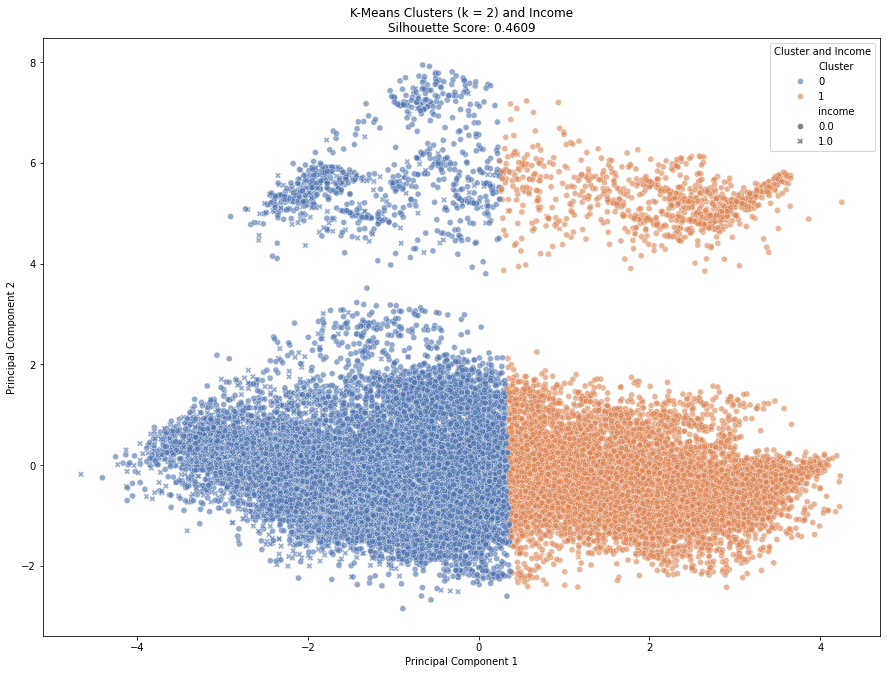

In [46]:
# Add cluster labels to the original dataframe
df_encoded['Cluster'] = clusters_kmeans

# Plot clusters with both cluster labels and income
plt.figure(figsize=(15, 11))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_encoded['Cluster'], style=df_encoded['income'], palette='deep', legend='full', alpha=0.6)
plt.title(f'K-Means Clusters (k = {n_clusters}) and Income\nSilhouette Score: {kmeans_silhouette_score:.4f}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster and Income')
plt.show()

### Hierarchical Clustering



Hierarchical Clustering Silhouette Score: 0.46604679356446255


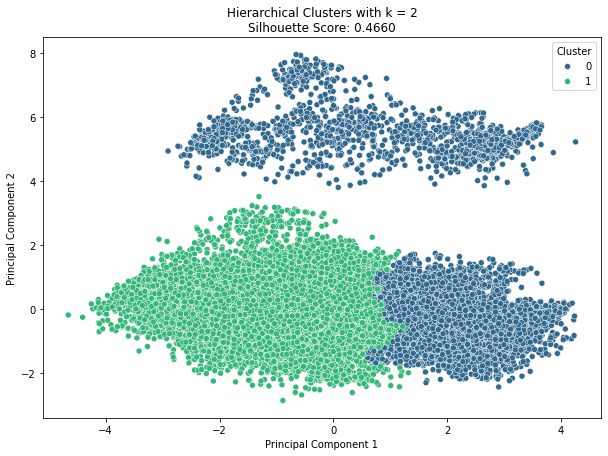

In [47]:
# Train Hierarchical Clustering model
hierarchical = AgglomerativeClustering(n_clusters=2)
clusters_hierarchical = hierarchical.fit_predict(X_pca)
hierarchical_silhouette_score = silhouette_score(X_pca, clusters_hierarchical)

print(f"Hierarchical Clustering Silhouette Score: {hierarchical_silhouette_score}")

# Visualize Hierarchical Clusters using PCA (for visualization)
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters_hierarchical, palette='viridis', legend='full')
plt.title(f'Hierarchical Clusters with k = 2\nSilhouette Score: {hierarchical_silhouette_score:.4f}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


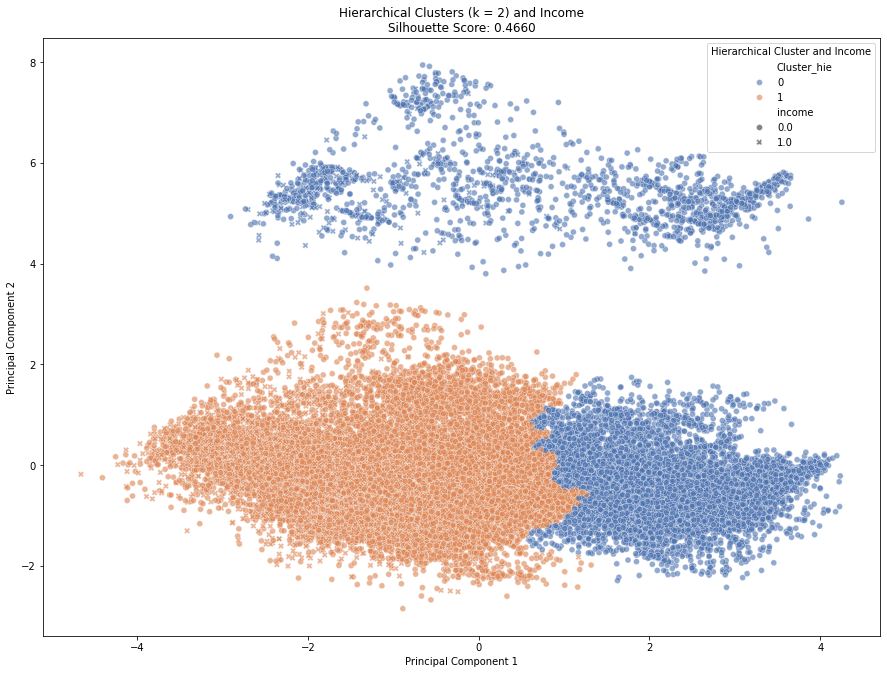

In [48]:
# Add cluster labels to the original dataframe
df_encoded['Cluster_hie'] = clusters_hierarchical

# Plot clusters with both cluster labels and income
plt.figure(figsize=(15, 11))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_encoded['Cluster_hie'], 
                style=df_encoded['income'], palette='deep', legend='full', alpha=0.6)
plt.title(f'Hierarchical Clusters (k = {n_clusters}) and Income\nSilhouette Score: {hierarchical_silhouette_score:.4f}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Hierarchical Cluster and Income')
plt.show()

###  Density-Based Spatial Clustering of Applications with Noise (DBSCAN)



DBSCAN Clustering Silhouette Score: 0.5734988259843973


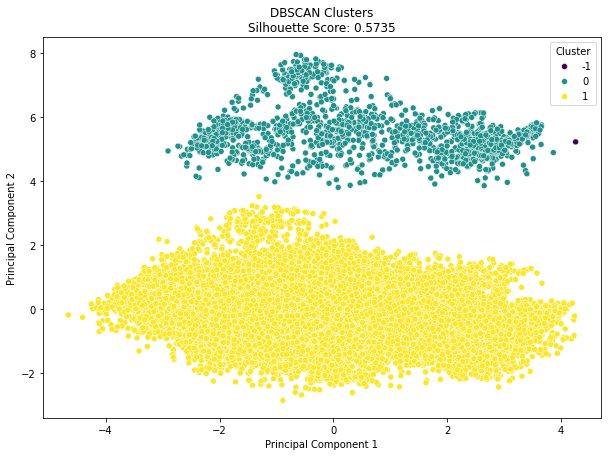

In [49]:
# Train DBSCAN Clustering model
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(X_pca)

# Compute silhouette score if clusters are found
if len(set(clusters_dbscan)) > 1:
    dbscan_silhouette_score = silhouette_score(X_pca, clusters_dbscan)
    print(f"DBSCAN Clustering Silhouette Score: {dbscan_silhouette_score}")
else:
    dbscan_silhouette_score = -1
    print("DBSCAN did not find enough clusters.")


# Visualize DBSCAN Clusters using PCA (for visualization)
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters_dbscan, palette='viridis', legend='full')
plt.title(f'DBSCAN Clusters\nSilhouette Score: {dbscan_silhouette_score:.4f}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


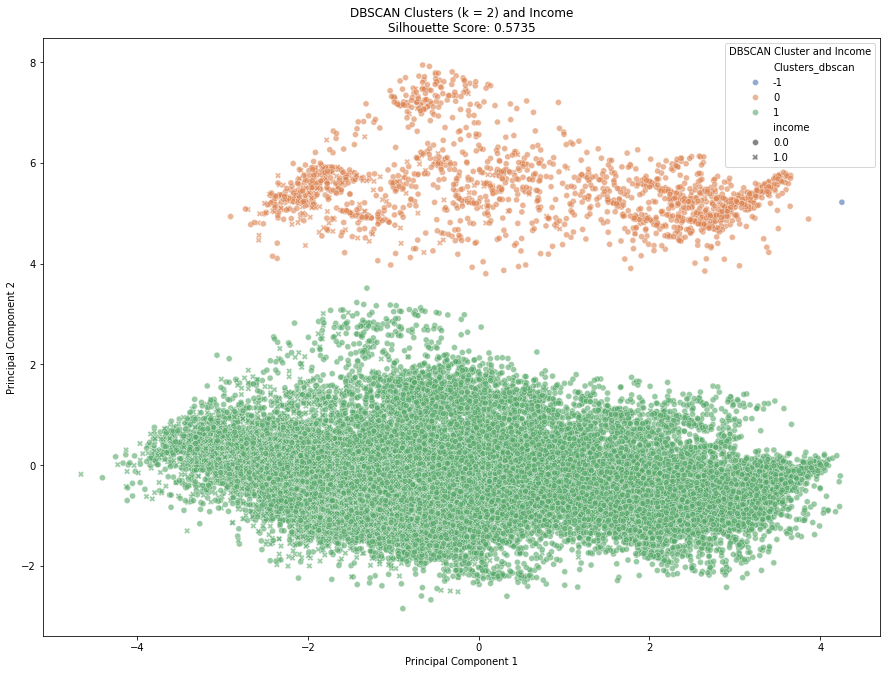

In [50]:
# Add cluster labels to the original dataframe
df_encoded['Clusters_dbscan'] = clusters_dbscan

# Plot clusters with both cluster labels and income
plt.figure(figsize=(15, 11))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_encoded['Clusters_dbscan'], 
                style=df_encoded['income'], palette='deep', legend='full', alpha=0.6)
plt.title(f'DBSCAN Clusters (k = {n_clusters}) and Income\nSilhouette Score: {dbscan_silhouette_score:.4f}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='DBSCAN Cluster and Income')
plt.show()

## Neural Networks


### Simple Feedforward Neural Network


Epoch 1/20
651/651 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7839 - loss: 0.4389 - val_accuracy: 0.8264 - val_loss: 0.3622
Epoch 2/20
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8298 - loss: 0.3581 - val_accuracy: 0.8254 - val_loss: 0.3586
Epoch 3/20
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8307 - loss: 0.3600 - val_accuracy: 0.8310 - val_loss: 0.3534
Epoch 4/20
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8333 - loss: 0.3534 - val_accuracy: 0.8304 - val_loss: 0.3564
Epoch 5/20
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8367 - loss: 0.3476 - val_accuracy: 0.8321 - val_loss: 0.3566
Epoch 6/20
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8347 - loss: 0.3465 - val_accuracy: 0.8346 - val_loss: 0.3548
Epoch 7/20
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8392 - loss: 0.3469 - val_accuracy: 0.8358 - val_loss: 0.3563
Epoch 8/20
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8359 - loss: 0.3434 - val_accuracy: 0.

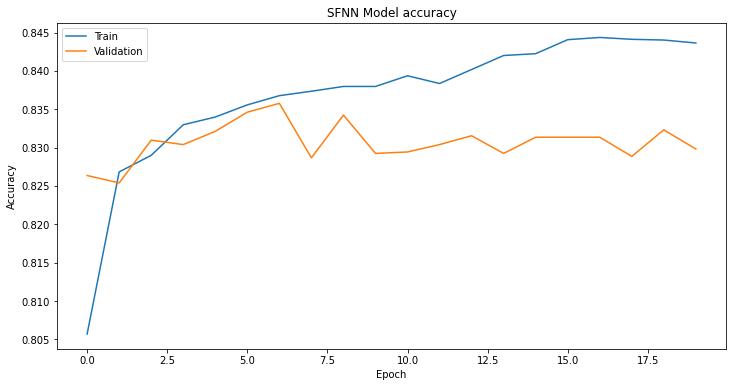

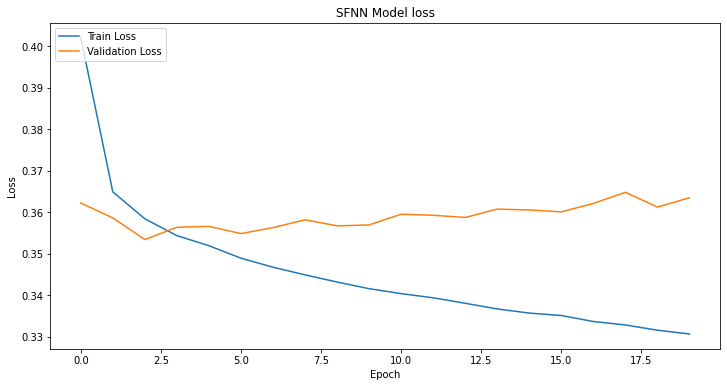

In [75]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
y_pred_nn = (model.predict(X_test) > 0.5)

# Print accuracy as a percentage
accuracy_percentage = accuracy * 100
print(f"Simple Feedforward Neural Network Accuracy: {accuracy_percentage:.2f}%")

print(f"Simple Feedforward Neural Network Model Loss: {loss}")

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('SFNN Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('SFNN Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

### Artificial Neural Network (ANN)


Epoch 1/20
651/651 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7994 - loss: 0.4216 - val_accuracy: 0.8279 - val_loss: 0.3619
Epoch 2/20
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8313 - loss: 0.3587 - val_accuracy: 0.8312 - val_loss: 0.3576
Epoch 3/20
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8357 - loss: 0.3535 - val_accuracy: 0.8356 - val_loss: 0.3555
Epoch 4/20
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8303 - loss: 0.3521 - val_accuracy: 0.8346 - val_loss: 0.3559
Epoch 5/20
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8301 - loss: 0.3518 - val_accuracy: 0.8321 - val_loss: 0.3560
Epoch 6/20
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8400 - loss: 0.3424 - val_accuracy: 0.8352 - val_loss: 0.3580
Epoch 7/20
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8384 - loss: 0.3403 - val_accuracy: 0.8304 - val_loss: 0.3552
Epoch 8/20
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8400 - loss: 0.3372 - val_accuracy: 0.

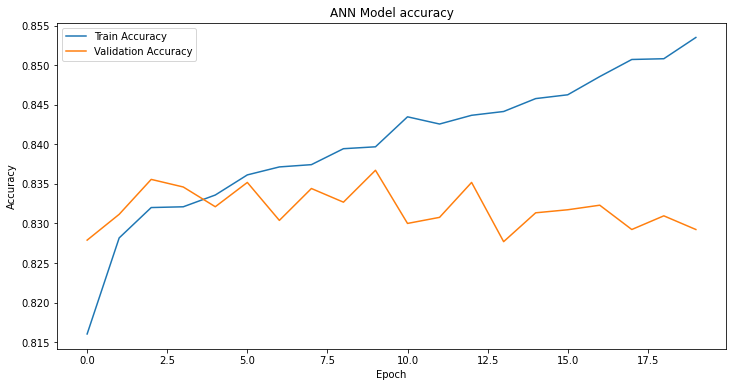

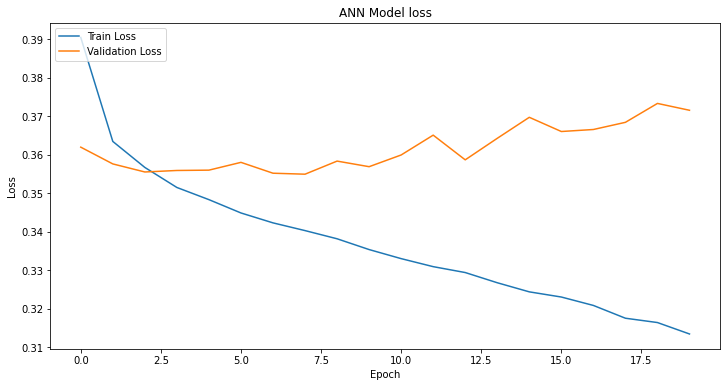

In [53]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Initializing the ANN
ann = tf.keras.models.Sequential()

# Adding layers to the model
ann.add(tf.keras.layers.Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
ann.add(tf.keras.layers.Dense(units=32, activation='relu'))
ann.add(tf.keras.layers.Dense(units=16, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compile the model
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_ann = ann.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model
loss_ann, accuracy_ann = ann.evaluate(X_test, y_test)
y_pred_ann = (ann.predict(X_test) > 0.5)

# Print accuracy as a percentage
accuracy_percentage = accuracy_ann * 100
print(f"ANN Model Accuracy: {accuracy_percentage:.2f}%")

print(f"ANN Model Loss: {loss_ann}")

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history_ann.history['accuracy'], label='Train Accuracy')
plt.plot(history_ann.history['val_accuracy'], label='Validation Accuracy')
plt.title('ANN Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history_ann.history['loss'], label='Train Loss')
plt.plot(history_ann.history['val_loss'], label='Validation Loss')
plt.title('ANN Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Task 4: Optimisation of the Machine Learning Models

## Optimised Classification Models

### Optimised Logistic Regression

Best Logistic Regression Parameters: {'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 200, 'l1_ratio': 0.3333333333333333, 'class_weight': None, 'C': 545.5594781168514}
Best Logistic Regression CV Accuracy: 0.8250798033599744
Best Logistic Regression Test Accuracy: 0.8263675476336816
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.91      0.89      4988
         1.0       0.65      0.55      0.60      1520

    accuracy                           0.83      6508
   macro avg       0.76      0.73      0.74      6508
weighted avg       0.82      0.83      0.82      6508



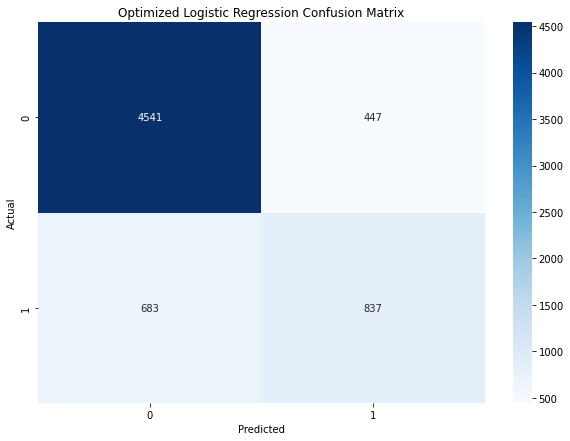

In [54]:
from sklearn.model_selection import RandomizedSearchCV

# Define the expanded parameter distribution
param_dist_lr = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['lbfgs', 'saga'],  # 'lbfgs' does not support 'l1' or 'elasticnet'
    'max_iter': [100, 200, 300, 400, 500, 1000],
    'class_weight': [None, 'balanced'],
    'l1_ratio': np.linspace(0, 1, 10)  # Only used if penalty is 'elasticnet'
}


# Define the RandomizedSearchCV object
random_lr = RandomizedSearchCV(LogisticRegression(dual=False), param_distributions=param_dist_lr, 
                               n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_lr.fit(X_train, y_train)

# Get the best parameters and score
best_random_lr = random_lr.best_estimator_
best_random_lr_score = random_lr.best_score_

# Evaluate on the test set
y_pred_best_random_lr = best_random_lr.predict(X_test)
best_random_lr_test_score = accuracy_score(y_test, y_pred_best_random_lr)
conf_matrix_best_random_lr = confusion_matrix(y_test, y_pred_best_random_lr)

print(f"Best Logistic Regression Parameters: {random_lr.best_params_}")
print(f"Best Logistic Regression CV Accuracy: {best_random_lr_score}")
print(f"Best Logistic Regression Test Accuracy: {best_random_lr_test_score}")
print("Classification Report:\n", classification_report(y_test, y_pred_best_random_lr))

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_best_random_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Optimized Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### Optimised K-Nearest Neighbors (KNN)

Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'uniform'}
Best KNN Test Accuracy: 0.8288260602335586
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.91      0.89      4988
         1.0       0.66      0.56      0.61      1520

    accuracy                           0.83      6508
   macro avg       0.76      0.74      0.75      6508
weighted avg       0.82      0.83      0.82      6508

Confusion Matrix:
 [[4539  449]
 [ 665  855]]


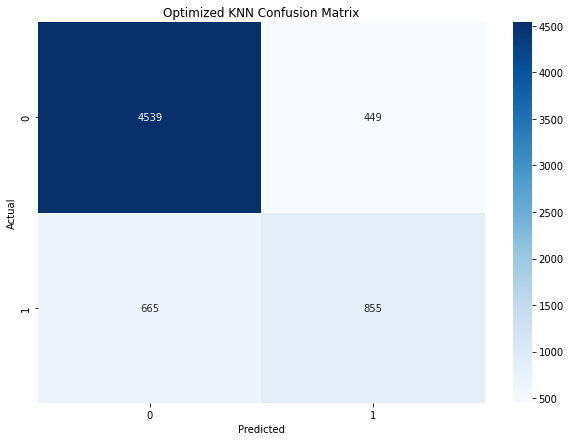

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 10, 15, 20],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Setup GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Retrieve the best estimator
best_knn = grid_search.best_estimator_

# Predict using the best estimator
y_pred_best_knn = best_knn.predict(X_test)
best_knn_test_score = accuracy_score(y_test, y_pred_best_knn)
conf_matrix_best_knn = confusion_matrix(y_test, y_pred_best_knn)

# Display the results
print(f"Best KNN Parameters: {grid_search.best_params_}")
print(f"Best KNN Test Accuracy: {best_knn_test_score}")
print("Classification Report:\n", classification_report(y_test, y_pred_best_knn))
print("Confusion Matrix:\n", conf_matrix_best_knn)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_best_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Optimized KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### Optimised Random Forest

Best Random Forest Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 300}
Best Random Forest CV Accuracy: 0.8383725273764145
Random Forest Test Accuracy: 0.8362015980331899
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.92      0.90      4988
         1.0       0.68      0.56      0.61      1520

    accuracy                           0.84      6508
   macro avg       0.78      0.74      0.76      6508
weighted avg       0.83      0.84      0.83      6508



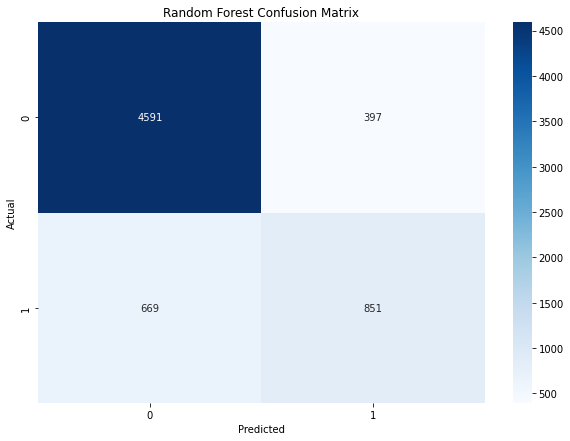

In [56]:
# Define the parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300], 
    'max_features': ['auto', 'sqrt'], 
    'max_depth': [10, 20, 30]
}

# Define the GridSearchCV object
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

# Get the best parameters and score
best_rf = grid_rf.best_estimator_
best_rf_score = grid_rf.best_score_

# Evaluate on the test set
y_pred_rf = best_rf.predict(X_test)
rf_test_score = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print(f"Best Random Forest Parameters: {grid_rf.best_params_}")
print(f"Best Random Forest CV Accuracy: {best_rf_score}")
print(f"Random Forest Test Accuracy: {rf_test_score}")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Optimised Clustering Models

### Optimised K Means Clustering

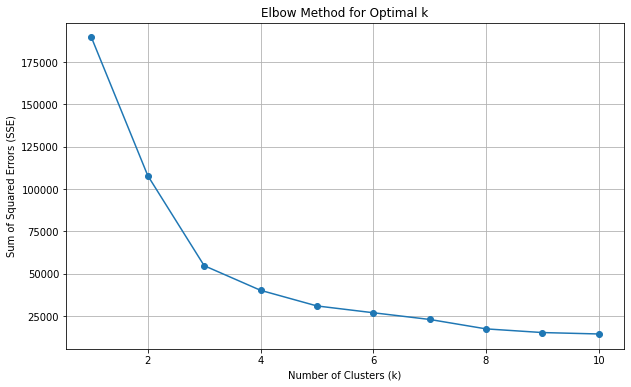

In [57]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  X_scaled is my preprocessed dataset without the target variable
# Use PCA to reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Finding the optimal number of clusters using the Elbow Method
sse = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_pca)
    sse.append(kmeans.inertia_)

# Plotting the Elbow plot
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


Silhouette Score for k=3: 0.5223397082886305


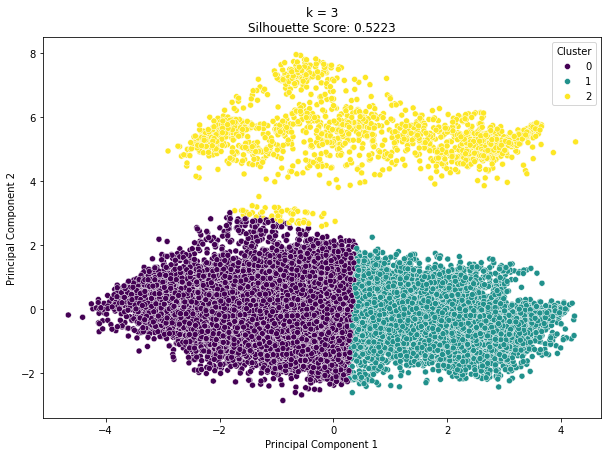

In [61]:
from sklearn.metrics import silhouette_score

# Perform K-Means clustering with the optimal number of clusters
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
Opt_clusters_kmeans = kmeans.fit_predict(X_pca)


# Calculate the silhouette score
Opt_silhouette_avg = silhouette_score(X_pca, Opt_clusters_kmeans)
print(f'Silhouette Score for k={optimal_k}: {Opt_silhouette_avg}')



# Plot clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=Opt_clusters_kmeans, palette='viridis', legend='full')
plt.title(f'k = {optimal_k}\nSilhouette Score: {Opt_silhouette_avg:.4f}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()




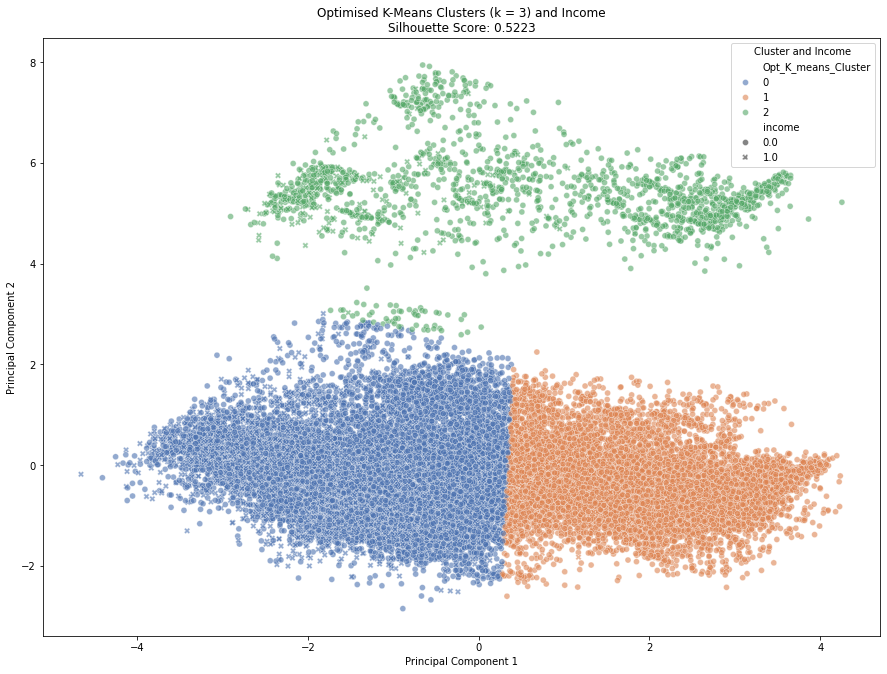

In [63]:
# Add cluster labels to the original dataframe
df_encoded['Opt_K_means_Cluster'] = Opt_clusters_kmeans

# Plot clusters with both cluster labels and income
plt.figure(figsize=(15, 11))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_encoded['Opt_K_means_Cluster'], 
                style=df_encoded['income'], palette='deep', legend='full', alpha=0.6)
plt.title(f'Optimised K-Means Clusters (k = {optimal_k}) and Income\nSilhouette Score: {Opt_silhouette_avg:.4f}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster and Income')
plt.show()

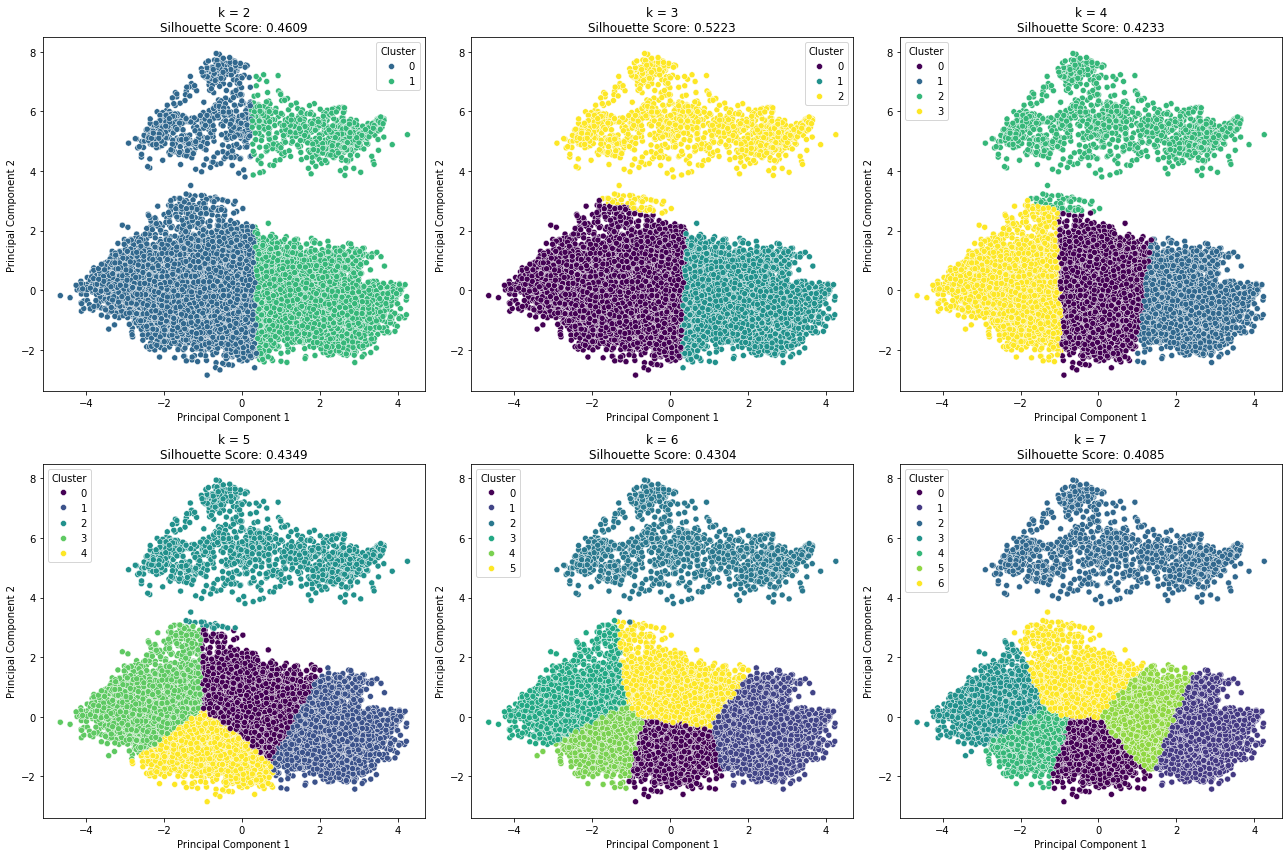


Best Silhouette Score: 0.5223 for k = 3


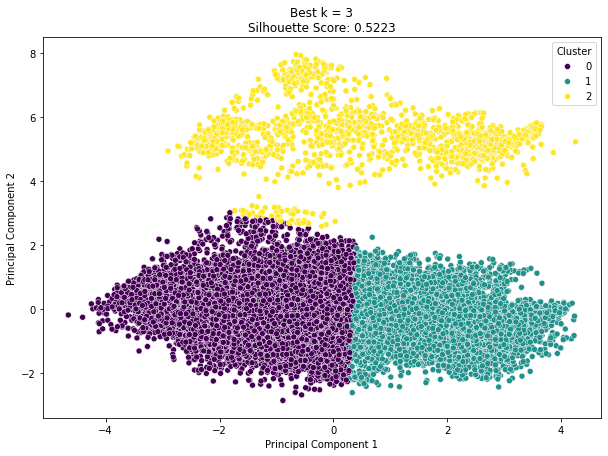

In [64]:

#  X_scaled is my preprocessed dataset without the target variable
# Use PCA to reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


# Initialize variables to track the best silhouette score and corresponding k
best_silhouette_score = -1
best_k = 2

# Plot the clusters for different values of k and track the best silhouette score
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

for ax, k in zip(axs.flatten(), range(2, 8)):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(X_pca)
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    
    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_k = k
        
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette='viridis', legend='full', ax=ax)
    ax.set_title(f'k = {k}\nSilhouette Score: {silhouette_avg:.4f}')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.legend(title='Cluster')

plt.tight_layout()
plt.show()

# Print the best silhouette score and corresponding k
print(f"\nBest Silhouette Score: {best_silhouette_score:.4f} for k = {best_k}")

# Plot clusters with the best silhouette score
plt.figure(figsize=(10, 7))
kmeans = KMeans(n_clusters=best_k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette='viridis', legend='full')
plt.title(f'Best k = {best_k}\nSilhouette Score: {best_silhouette_score:.4f}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


### Optimised Hierarchical Clustering

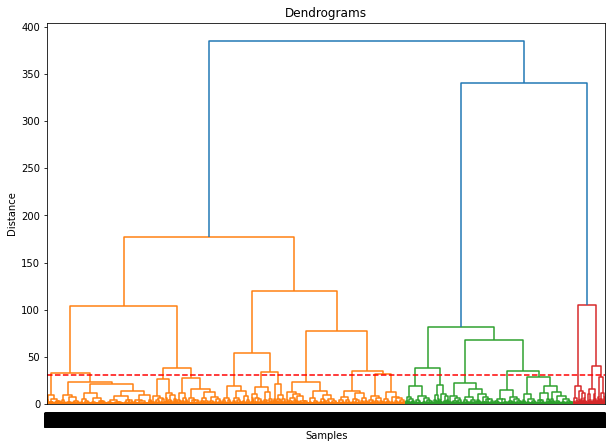

In [65]:

from scipy.cluster.hierarchy import dendrogram, linkage

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use PCA to reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#Draw Dendrogram with ward's method
plt.figure(figsize=(10,7))
plt.title("Dendrograms")
plt.xlabel('Samples')
plt.ylabel('Distance')
dend = dendrogram(linkage(X_pca, method='ward'))
plt.axhline(y=30,color='r', linestyle='--')


Silhouette Score for n_clusters = 2: 0.46604679356446255
Silhouette Score for n_clusters = 3: 0.5149644848613192
Silhouette Score for n_clusters = 4: 0.4041462981847401
Silhouette Score for n_clusters = 5: 0.39252896396955406
Silhouette Score for n_clusters = 6: 0.39746256642967315
Silhouette Score for n_clusters = 7: 0.4058573403158245
Silhouette Score for n_clusters = 8: 0.360061061257088
Silhouette Score for n_clusters = 9: 0.3715500467342393
Silhouette Score for n_clusters = 10: 0.3708981685863855


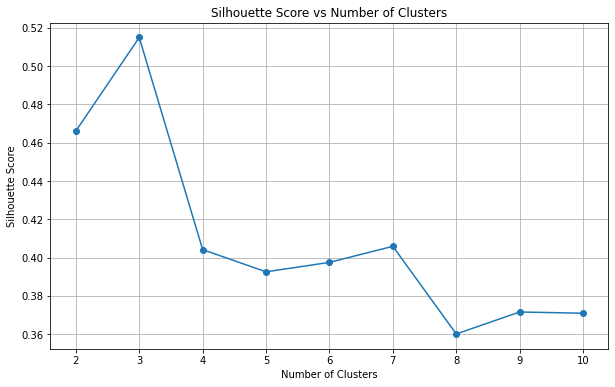

Optimal number of clusters: 3
Hierarchical Clustering Silhouette Score with optimal clusters: 0.5149644848613192


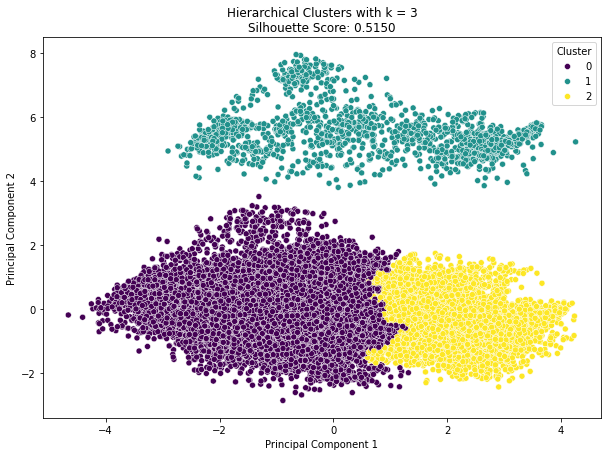

In [69]:

# Use PCA to reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Find the optimal number of clusters using silhouette score
silhouette_scores = []
range_n_clusters = range(2, 11)

for n_clusters in range_n_clusters:
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', memory=None,
                                           connectivity=None, compute_full_tree='auto', linkage='ward')
    clusters = hierarchical.fit_predict(X_pca)
    silhouette_avg = silhouette_score(X_pca, clusters)
    silhouette_scores.append(silhouette_avg)
    print(f"Silhouette Score for n_clusters = {n_clusters}: {silhouette_avg}")

# Plot silhouette scores for different number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.grid(True)
plt.show()

# Find the optimal number of clusters
optimal_n_clusters = range_n_clusters[np.argmax(silhouette_scores)]
print(f'Optimal number of clusters: {optimal_n_clusters}')

# Train Hierarchical Clustering model with the optimal number of clusters
hierarchical = AgglomerativeClustering(n_clusters=optimal_n_clusters, metric='euclidean', memory=None,
                                           connectivity=None, compute_full_tree='auto', linkage='ward')
clusters_hierarchical = hierarchical.fit_predict(X_pca)
hierarchical_silhouette_score = silhouette_score(X_pca, clusters_hierarchical)


print(f"Hierarchical Clustering Silhouette Score with optimal clusters: {hierarchical_silhouette_score}")

# Visualize Hierarchical Clusters using PCA (for visualization)
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters_hierarchical, palette='viridis', legend='full')
plt.title(f'Hierarchical Clusters with k = {optimal_n_clusters}\nSilhouette Score: {hierarchical_silhouette_score:.4f}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


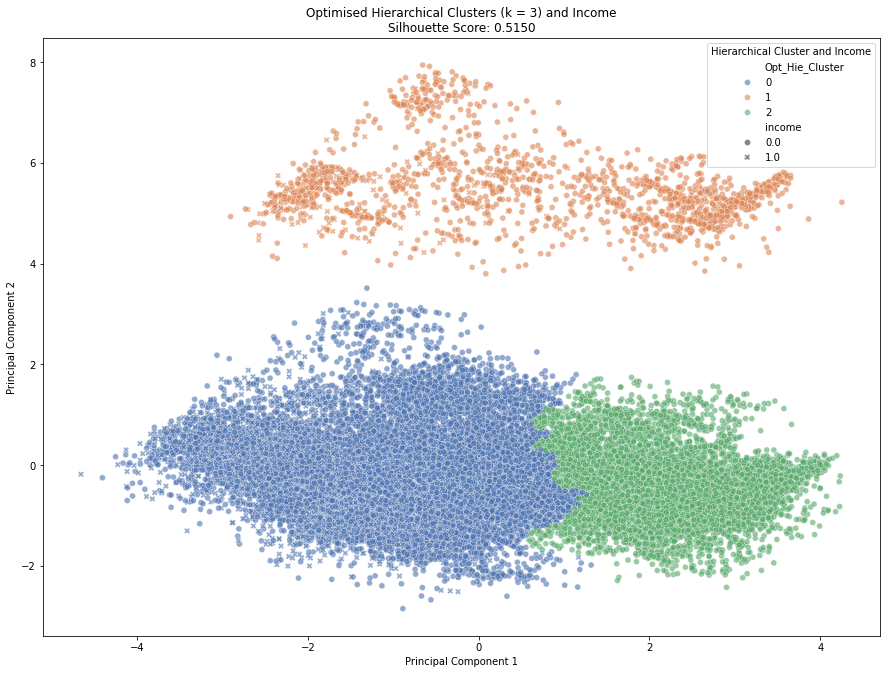

In [70]:
# Add cluster labels to the original dataframe
df_encoded['Opt_Hie_Cluster'] = clusters_hierarchical

# Plot clusters with both cluster labels and income
plt.figure(figsize=(15, 11))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_encoded['Opt_Hie_Cluster'], 
                style=df_encoded['income'], palette='deep', legend='full', alpha=0.6)
plt.title(f'Optimised Hierarchical Clusters (k = {optimal_n_clusters}) and Income\nSilhouette Score: {hierarchical_silhouette_score:.4f}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Hierarchical Cluster and Income')
plt.show()

### Optimised Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

Best DBSCAN parameters: eps = 0.4, min_samples = 3
Best Silhouette Score: 0.5734988259843973
Number of clusters found by DBSCAN: 2


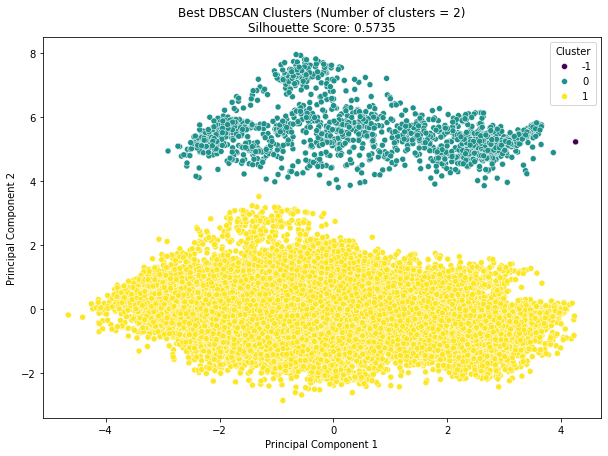

In [71]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use PCA to reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Optimize DBSCAN parameters
best_silhouette_score = -1
best_eps = None
best_min_samples = None
best_clusters = None

# Grid search over parameters
eps_values = np.arange(0.3, 1.0, 0.1)
min_samples_values = range(3, 10)

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        opt_clusters_dbscan = dbscan.fit_predict(X_pca)
        if len(set(opt_clusters_dbscan)) > 1:
            score = silhouette_score(X_pca, opt_clusters_dbscan)
            if score > best_silhouette_score:
                best_silhouette_score = score
                best_eps = eps
                best_min_samples = min_samples
                best_clusters = opt_clusters_dbscan

# Print the best parameters and silhouette score
print(f"Best DBSCAN parameters: eps = {best_eps}, min_samples = {best_min_samples}")
print(f"Best Silhouette Score: {best_silhouette_score}")

# Determine the number of clusters, excluding noise points
n_clusters_dbscan = len(set(best_clusters)) - (1 if -1 in best_clusters else 0)
print(f"Number of clusters found by DBSCAN: {n_clusters_dbscan}")

# Visualize the best DBSCAN Clusters using PCA (for visualization)
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=best_clusters, palette='viridis', legend='full')
plt.title(f'Best DBSCAN Clusters (Number of clusters = {n_clusters_dbscan})\nSilhouette Score: {best_silhouette_score:.4f}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


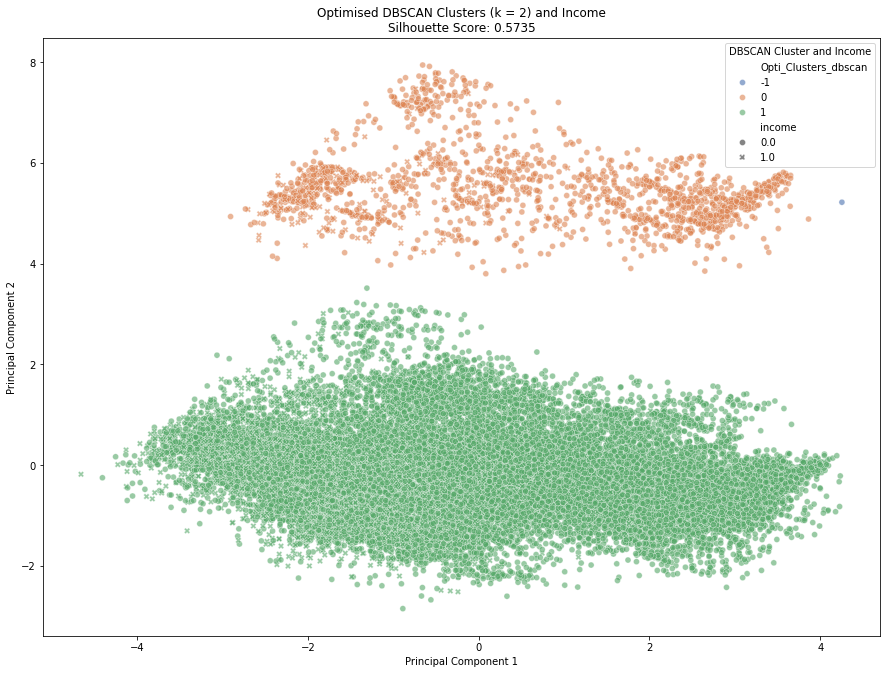

In [72]:
# Add cluster labels to the original dataframe
df_encoded['Opti_Clusters_dbscan'] = clusters_dbscan

# Plot clusters with both cluster labels and income
plt.figure(figsize=(15, 11))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_encoded['Opti_Clusters_dbscan'], 
                style=df_encoded['income'], palette='deep', legend='full', alpha=0.6)
plt.title(f'Optimised DBSCAN Clusters (k = {n_clusters_dbscan}) and Income\nSilhouette Score: {best_silhouette_score:.4f}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='DBSCAN Cluster and Income')
plt.show()

## Optimised Neural Networks

### Optimised Simple Feedforward Neural Network

Epoch 1/10
651/651 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7927 - loss: 0.4203 - val_accuracy: 0.8258 - val_loss: 0.3601
Epoch 2/10
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8303 - loss: 0.3604 - val_accuracy: 0.8323 - val_loss: 0.3564
Epoch 3/10
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8339 - loss: 0.3547 - val_accuracy: 0.8352 - val_loss: 0.3544
Epoch 4/10
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8365 - loss: 0.3479 - val_accuracy: 0.8327 - val_loss: 0.3531
Epoch 5/10
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8383 - loss: 0.3403 - val_accuracy: 0.8358 - val_loss: 0.3540
Epoch 6/10
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8391 - loss: 0.3365 - val_accuracy: 0.8294 - val_loss: 0.3574
Epoch 7/10
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8438 - loss: 0.3345 - val_accuracy: 0.8352 - val_loss: 0.3537
Epoch 8/10
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8401 - loss: 0.3337 - val_accuracy: 0.

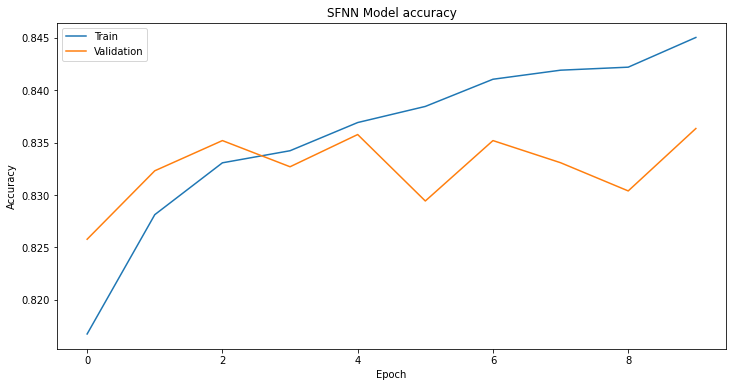

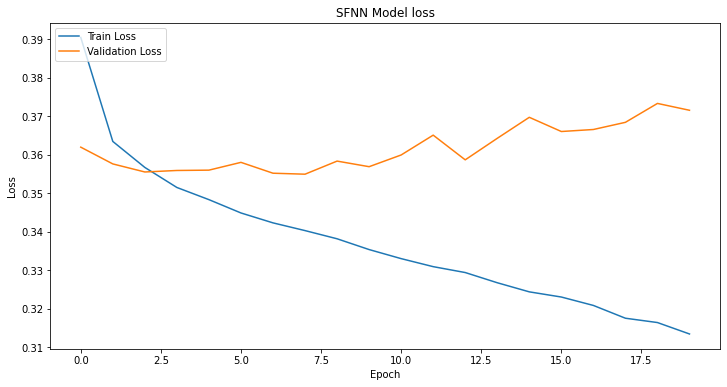

In [74]:
# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
y_pred_nn = (model.predict(X_test) > 0.5)

# Print accuracy as a percentage
accuracy_percentage = accuracy * 100
print(f"Simple Feedforward Neural Network Accuracy: {accuracy_percentage:.2f}%")

#Print the loss value
print(f"Simple Feedforward Neural Network loss: {loss}")



# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('SFNN Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history_ann.history['loss'], label='Train Loss')
plt.plot(history_ann.history['val_loss'], label='Validation Loss')
plt.title('SFNN Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

### Optimised Artificial Neural Network

Epoch 1/10
651/651 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8081 - loss: 0.4053 - val_accuracy: 0.8315 - val_loss: 0.3638
Epoch 2/10
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8257 - loss: 0.3689 - val_accuracy: 0.8296 - val_loss: 0.3592
Epoch 3/10
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8287 - loss: 0.3551 - val_accuracy: 0.8340 - val_loss: 0.3555
Epoch 4/10
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8359 - loss: 0.3453 - val_accuracy: 0.8317 - val_loss: 0.3558
Epoch 5/10
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8339 - loss: 0.3454 - val_accuracy: 0.8300 - val_loss: 0.3668
Epoch 6/10
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8390 - loss: 0.3396 - val_accuracy: 0.8321 - val_loss: 0.3612
Epoch 7/10
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8366 - loss: 0.3396 - val_accuracy: 0.8354 - val_loss: 0.3573
Epoch 8/10
651/651 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8385 - loss: 0.3405 - val_accuracy: 0.

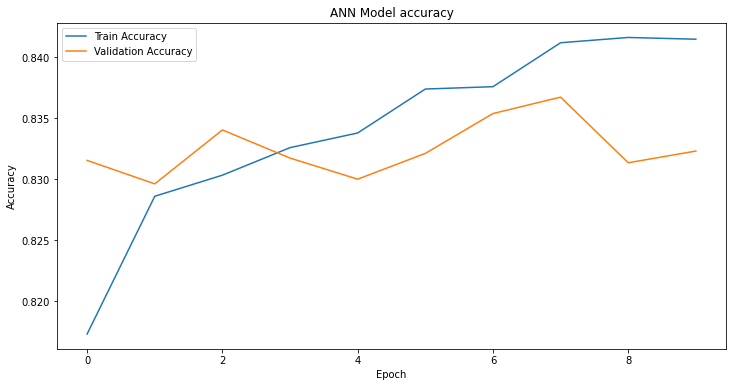

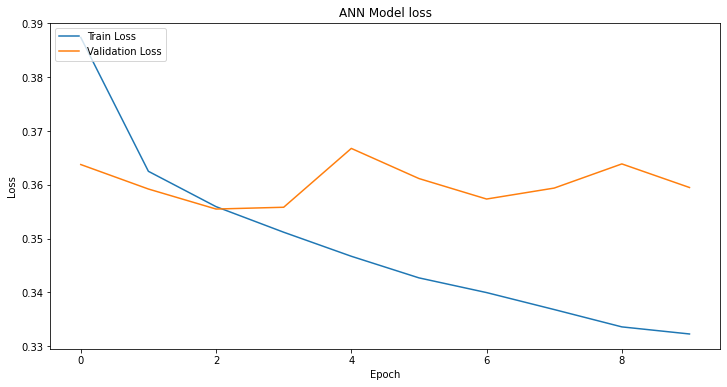

In [77]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Initializing the ANN
ann = tf.keras.models.Sequential()

# Adding layers to the model
ann.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(X_train.shape[1],)))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compile the model
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_ann = ann.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss_ann, accuracy_ann = ann.evaluate(X_test, y_test)
y_pred_ann = (ann.predict(X_test) > 0.5)

# Print accuracy as a percentage
accuracy_percentage = accuracy_ann * 100
print(f"ANN Model Accuracy: {accuracy_percentage:.2f}%")

#Print the loss value
print(f"ANN Model loss: {loss_ann}")

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history_ann.history['accuracy'], label='Train Accuracy')
plt.plot(history_ann.history['val_accuracy'], label='Validation Accuracy')
plt.title('ANN Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history_ann.history['loss'], label='Train Loss')
plt.plot(history_ann.history['val_loss'], label='Validation Loss')
plt.title('ANN Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

## Analysis of Results

In [78]:
# Sample accuracies for illustration
# Replace these with actual accuracies from your model evaluations
model_names = ['Logistic Regression', 'K-Nearest Neighbors', 'Random Forest', 
               'Simple Feedforward Neural Network', 'Artificial Neural Network', 'K-Means', 'Hierarchical Clustering', 'DBSCAN']
before_optimization = [82.63, 81.68, 82.73, 82.70, 82.73, 0.461, 0.466, 0.574]
after_optimization = [82.63, 82.90, 83.62, 83.11, 83.11, 0.522, 0.515, 0.574]

# Create a dictionary to store the results
results = {
    'Models': model_names,
    'Accuracy/Silhouette Before Optimization': before_optimization,
    'Accuracy/Silhouette After Optimization': after_optimization
}

# Create a DataFrame from the dictionary
results_df = pd.DataFrame(results)

# Set the index to start from 1
results_df.index = results_df.index + 1

# Display the DataFrame as a table
results_df


Models  Accuracy/Silhouette Before Optimization  \
1                Logistic Regression                                   82.630   
2                K-Nearest Neighbors                                   81.680   
3                      Random Forest                                   82.730   
4  Simple Feedforward Neural Network                                   82.700   
5          Artificial Neural Network                                   82.730   
6                            K-Means                                    0.461   
7            Hierarchical Clustering                                    0.466   
8                             DBSCAN                                    0.574   

   Accuracy/Silhouette After Optimization  
1                                  82.630  
2                                  82.900  
3                                  83.620  
4                                  83.110  
5                                  83.110  
6                                   0.522  
7                                   0.515  
8                                   0.574

### How optimisation improve the performance of the model? Which parameter was used for optimisation.

Optimization typically improves the performance of models by fine-tuning hyperparameters that control the learning process, the structure of the model, or other influential factors.Optimization is used systematically for searching for the best combination of hyperparameters that enhance the model's accuracy and generalization capability. This process involves using techniques like RandomizedSearchCV and GridSearchCV to explore a wide range of parameter values and identify the optimal settings. Below is an explanation of the specific parameters used for optimization for each model:

#### 1. Logistic Regression:

- **Optimization Technique: RandomizedSearchCV**
- **Parameters Used for Optimization:**
   - penalty: Specifies the norm of the penalty used in regularization ('l1', 'l2', 'elasticnet').
   - C: Inverse of regularization strength, with values ranging from 10^-4 to 10^4.
   - solver: Algorithm used for optimization ('lbfgs', 'saga'). Note that 'lbfgs' does not support 'l1' or 'elasticnet'.
   - max_iter: Maximum number of iterations for the solver.
   - class_weight: Adjusts weights inversely proportional to class frequencies ('None', 'balanced').
   - l1_ratio: Elastic net mixing parameter, only used if the penalty is 'elasticnet'.
   

#### 2.  K-Nearest Neighbors (KNN):

- **Optimization Technique: GridSearchCV**
- **Parameters Used for Optimization:**
  - n_neighbors: Number of neighbors to use (3, 5, 7, 10, 15, 20).
  - weights: Weight function used in prediction ('uniform', 'distance').
  - metric: Distance metric to use ('euclidean', 'manhattan', 'minkowski').
  

#### 3. Random Forest:

- **Optimization Technique: GridSearchCV**
- **Parameters Used for Optimization:**
  - n_estimators: Number of trees in the forest (100, 200, 300).
  - max_features: Number of features to consider for splitting ('auto', 'sqrt').
  - max_depth: Maximum depth of the tree (10, 20, 30).
  
  
#### 4. K-Means Clustering:

- **Optimization Technique: Elbow Method and Silhouette Score**
- **Parameters Used for Optimization:**
  - n_clusters: Number of clusters (range of 2 to 8 clusters).
  - init: Initialization method for the centroids ('k-means++').
  
  
#### 5. Hierarchical Clustering:

- **Optimization Technique: For Loop and Silhouette Score**
- **Parameters Used for Optimization:**
  - n_clusters: The number of clusters, optimized by iterating through a range of values (2 to 11) and selecting the one with the highest silhouette score.
  - metric='euclidean': The distance metric used to compute the linkage.
  - memory=None: Not using any caching.
  - connectivity=None: Not using any connectivity constraints.
  - compute_full_tree='auto': Whether to compute the full tree or not, decided automatically.
  - linkage='ward': The linkage criterion determining the cluster merging strategy.
  
  
#### 6. DBSCAN:

- **Optimization Technique: Grid Search**
- **Parameters Used for Optimization:**
  - eps: The maximum distance between two samples for them to be considered as in the same neighborhood (range of 0.3 to 1.0).
  - min_samples: The number of samples in a neighborhood for a point to be considered as a core point (range of 3 to 10).
  
  
#### 7. Simple Feedforward Neural Network (SFNN):

- **Optimization Technique: Manual tuning**
- **Parameters Used for Optimization:**
  - epochs: Reduced from 20 to 10 to prevent overfitting and reduce training time.
  - units: Increased from 32 or 64 to 128 to enhance learning capacity.


#### 8. Artificial Neural Network (ANN):

- **Optimization Technique: Manual tuning**
- **Parameters Used for Optimization:**
  - epochs: Reduced from 20 to 10 to prevent overfitting and reduce training time.
  - units: Increased from 32 or 64 to 128 to enhance learning capacity.

### Comparing the results among the models of similar types

Among the classification models, the Random Forest model exhibited the most significant improvement after optimization, with its accuracy increasing from 82.73% to 83.62%. K-Nearest Neighbors also saw a notable improvement, increasing from 81.68% to 82.90%. Logistic Regression's accuracy remained unchanged at 82.63%, suggesting that the initial hyperparameter settings were already near optimal or that further optimization did not significantly impact performance.

The Simple Feedforward Neural Network (SFNN) and the Artificial Neural Network (ANN) both demonstrated improvements after optimization. The SFNN's accuracy increased from 82.70% to 83.11%, while the ANN showed a similar improvement, rising from 82.73% to 83.11%.

For the clustering models, both K-Means and Hierarchical Clustering showed substantial enhancements in their silhouette scores following optimization. K-Means improved from a silhouette score of 0.461 to 0.522, and Hierarchical Clustering increased from 0.466 to 0.515. However, DBSCAN did not exhibit any change in its silhouette score, remaining constant at 0.574. This suggests that the initial parameter settings for DBSCAN were already optimal or that the chosen range for parameter tuning did not significantly affect the performance.

These improvements in clustering models emphasize the importance of finding the optimal number of clusters and fine-tuning relevant parameters to achieve better clustering performance. Overall, the optimization process has proven beneficial for most models, leading to enhanced accuracy and more effective clustering.

### The metrics applied to accurately test results

The metrics used to evaluate the performance of the models include **accuracy** for classification models, **silhouette scores** for clustering models, and **accuracy and loss values** for neural networks. **Accuracy** measures the proportion of correct predictions out of the total predictions and serves as a direct indicator of a classification model’s performance, including for neural networks like Simple Feedforward Neural Network and Artificial Neural Network. **Silhouette score** evaluates how similar an object is to its own cluster compared to other clusters, making it a common metric for assessing the quality of clustering models. **Loss values** in neural networks track the error between predicted values and actual values during training, with lower loss values indicating better learning and convergence. These metrics provide a quantitative basis for comparing the models before and after optimization, ensuring a comprehensive evaluation of their performance.

# Task 5: Overall conclusions

This project demonstrated a comprehensive approach to analyzing and predicting whether an individual is going to earn more than $50,000 annually using nine different machine learning models. The process began with loading the dataset from a CSV file, followed by meticulous data cleaning and manipulation to handle missing values and ensure consistency. Feature engineering, including encoding categorical variables, was performed to prepare the data for modeling. Exploratory Data Analysis (EDA) helped in understanding the data distribution, identifying patterns, and guiding the modeling process.

The dataset was split into training and testing sets, and features were standardized to ensure they were on the same scale, which is crucial for many machine learning algorithms. Principal Component Analysis (PCA) was employed to reduce the dimensionality of the dataset, facilitating better visualization and potentially enhancing model performance by eliminating noise and redundancy.

Nine models were trained: Logistic Regression, K-Nearest Neighbors (KNN), Random Forest for classification; K-Means, Hierarchical Clustering, DBSCAN for clustering; and Simple Feedforward Neural Network (SFNN) and Artificial Neural Network (ANN) as neural networks. Model performance was evaluated using appropriate metrics: accuracy for classification models and neural networks, and silhouette scores for clustering models. Loss values were also monitored for neural networks to assess learning and convergence. Afterwhich Optimization techniques significantly improved the performance of most models with the analysis as discussed in comparation of model results.

In conclusion, this project successfully illustrated the importance of a thorough and systematic approach to machine learning, from initial data handling through to model optimization, in predicting whether an individual is going to earn more than $50,000 annually. The enhancements observed in model performance underscore the critical role of optimization in achieving robust and accurate predictions, demonstrating the efficacy of various machine learning techniques on census data.